# **DataThon**

## **Importações das bibliotecas**

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model  import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import lightgbm as lgb
import xgboost

## **Importação dos dados**

In [2]:
caminho_train = Path('Datasets/train.csv')
caminho_teste = Path('Datasets/test.csv')

df_train = pd.read_csv(caminho_train)
df_test = pd.read_csv(caminho_teste)

### **Descrição dos dados**

In [3]:
print(f'Descrição do dados Treinamento {df_train.describe()}')
print(f'Descrição do dados Teste {df_test.describe()}')

Descrição do dados Treinamento                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.64540

### **Informações**

In [4]:
print(f'Informações do dados Treinamento {df_train.info()}')
print(f'Informações do dados Teste {df_test.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **Merge dos dados de treinamento e teste**

In [5]:
df_concat = pd.concat((df_train.loc[:, :], df_test.loc[:, :]))
df_concat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### **Analisando as colunas do typo object**

In [6]:
coluna_object = df_concat.select_dtypes(include='object').columns
coluna_object

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### **Analisando os dados do tipo number**

In [7]:
coluna_number = df_concat.select_dtypes(include='number').columns
coluna_number

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### **Tratando os dados com outliers e dados faltantes do type number**

In [8]:
def tratar_dados_numericos(df, colunas_numericas):
    # Criar uma cópia explícita do DataFrame
    df_tratado = df.copy(deep=True)
    
    # Resetar o índice para evitar problemas com duplicatas
    df_tratado = df_tratado.reset_index(drop=True)
    
    # Colunas que não devem ter outliers removidos
    colunas_sem_outliers = ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 
                           'MoSold', 'YrSold', 'BsmtFullBath', 'BsmtHalfBath', 
                           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                           'Fireplaces', 'GarageCars']
    
    # Colunas que podem ter outliers tratados
    colunas_com_outliers = [col for col in colunas_numericas 
                           if col not in colunas_sem_outliers]
    
    # 1. Tratamento de valores faltantes
    for coluna in colunas_numericas:
        if df_tratado[coluna].isnull().any():
            if coluna == 'GarageYrBlt':
                df_tratado[coluna] = df_tratado[coluna].fillna(df_tratado['YearBuilt'])
            
            elif coluna == 'LotFrontage':
                # Calcular medianas por bairro
                medianas_bairro = df_tratado.groupby('Neighborhood')[coluna].transform('median')
                df_tratado[coluna] = df_tratado[coluna].fillna(medianas_bairro)
            
            elif coluna in ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
                df_tratado[coluna] = df_tratado[coluna].fillna(0)
            
            else:
                df_tratado[coluna] = df_tratado[coluna].fillna(df_tratado[coluna].median())
    
    # 2. Tratamento de outliers para colunas selecionadas
    for coluna in colunas_com_outliers:
        Q1 = df_tratado[coluna].quantile(0.25)
        Q3 = df_tratado[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        df_tratado[coluna] = df_tratado[coluna].clip(lower=limite_inferior, upper=limite_superior)
    
    return df_tratado

In [9]:
df_tratado = tratar_dados_numericos(df_concat, coluna_number)

In [10]:
# def visualizar_tratamento_v2(df_original, df_tratado, coluna):
#     # Configurar o estilo
#     sns.set_style("whitegrid")
    
#     # Criar a figura
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
#     # Plotar usando seaborn
#     sns.boxplot(data=df_original, y=coluna, ax=ax1)
#     ax1.set_title(f'{coluna} - Antes do tratamento')
    
#     sns.boxplot(data=df_tratado, y=coluna, ax=ax2)
#     ax2.set_title(f'{coluna} - Depois do tratamento')
    
#     # Ajustar o layout
#     plt.tight_layout()
#     plt.show()
def visualizar_tratamento_v2(df_original, df_tratado, coluna):
    # Criar uma figura com dois subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Garantir que os DataFrames têm índices únicos
    df_original = df_original.reset_index(drop=True)
    df_tratado = df_tratado.reset_index(drop=True)
    
    # Plotar usando seaborn
    sns.boxplot(data=df_original, y=coluna, ax=ax1)
    ax1.set_title(f'{coluna} - Antes do tratamento')
    
    sns.boxplot(data=df_tratado, y=coluna, ax=ax2)
    ax2.set_title(f'{coluna} - Depois do tratamento')
    
    plt.tight_layout()
    plt.show()

In [11]:
print("Nomes de colunas duplicados:", df_concat.columns[df_concat.columns.duplicated()].tolist())
print("Todas as colunas:", df_concat.columns.tolist())

Nomes de colunas duplicados: []
Todas as colunas: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'

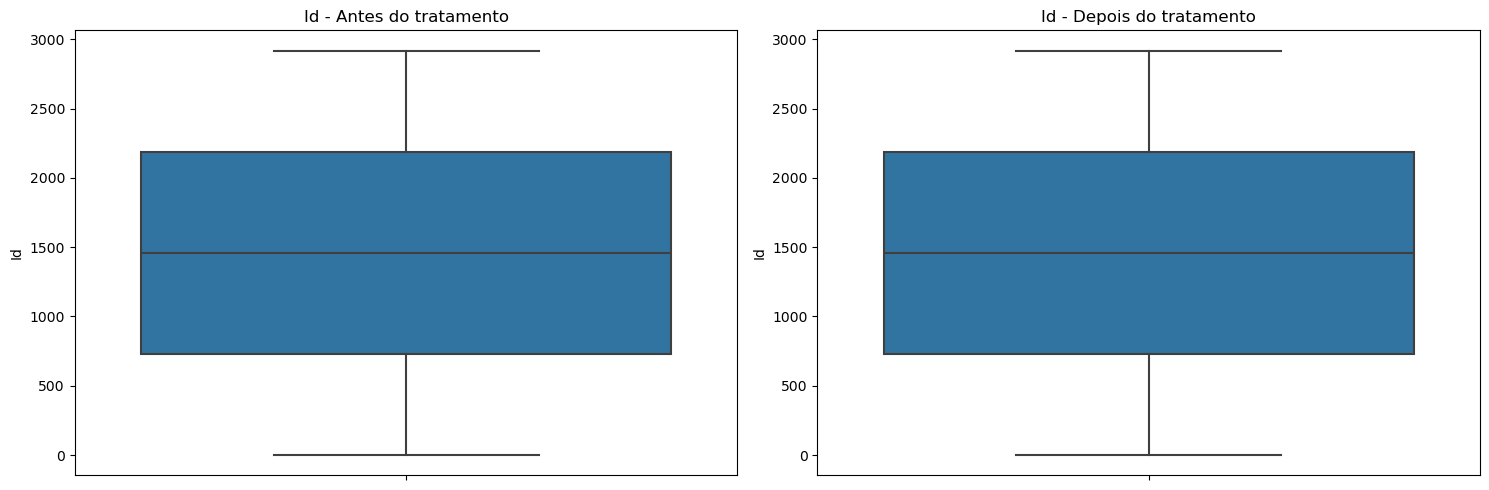

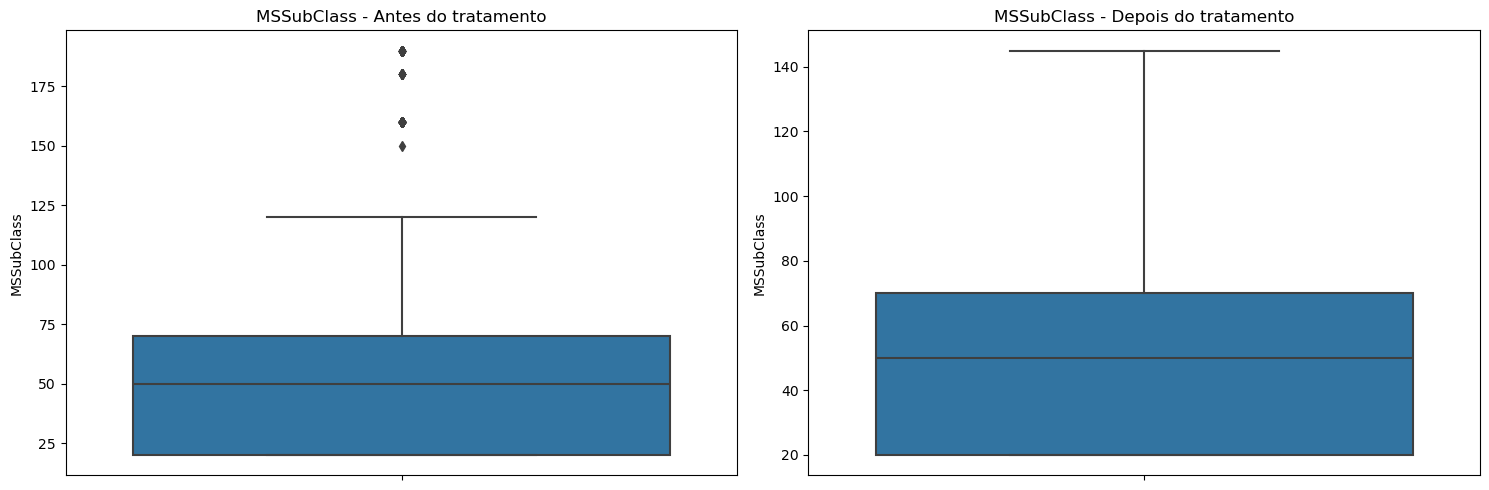

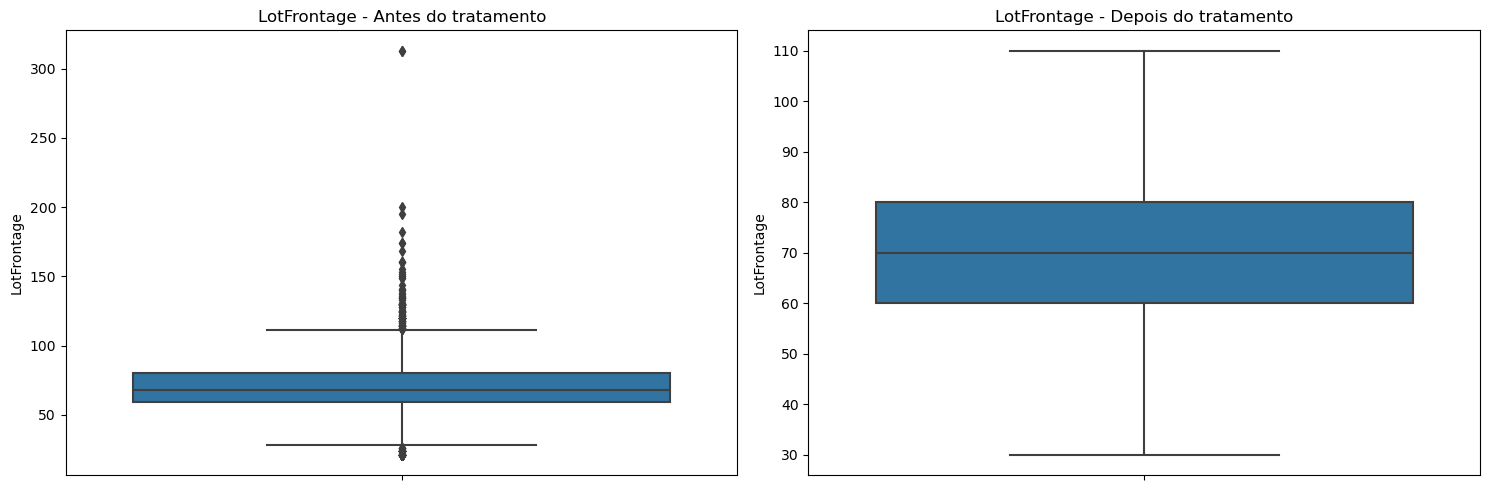

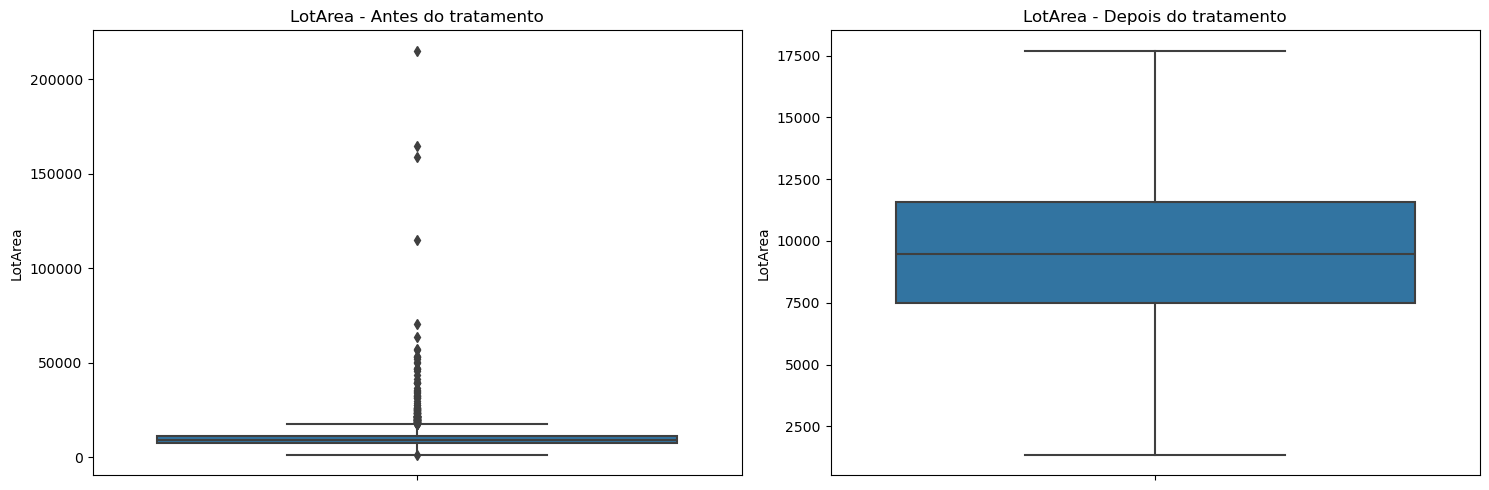

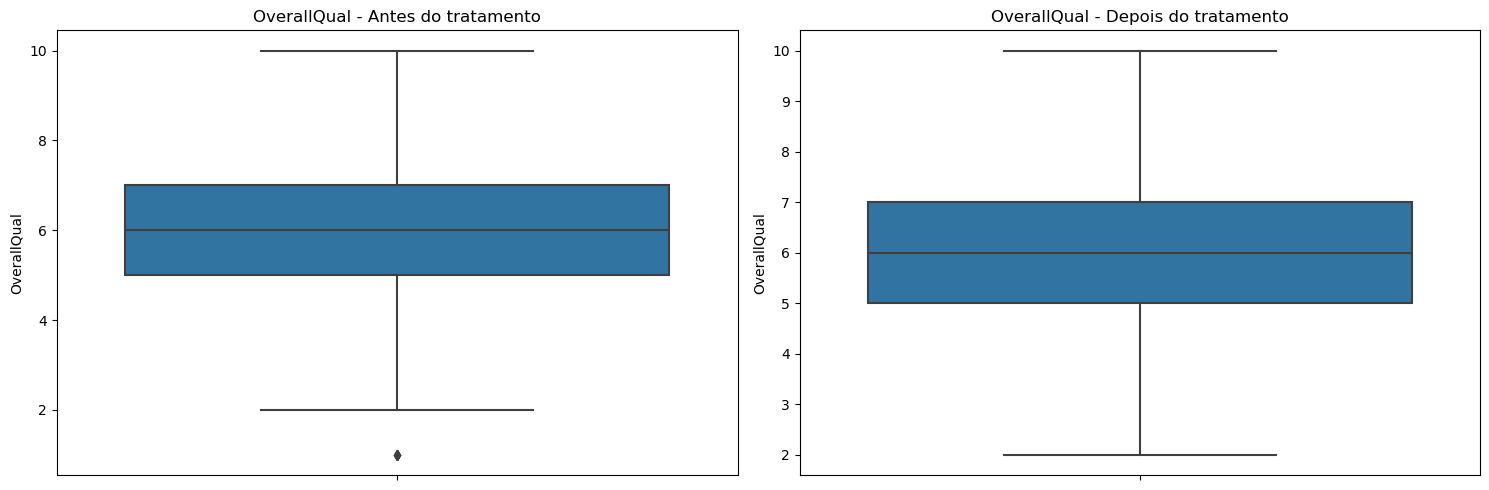

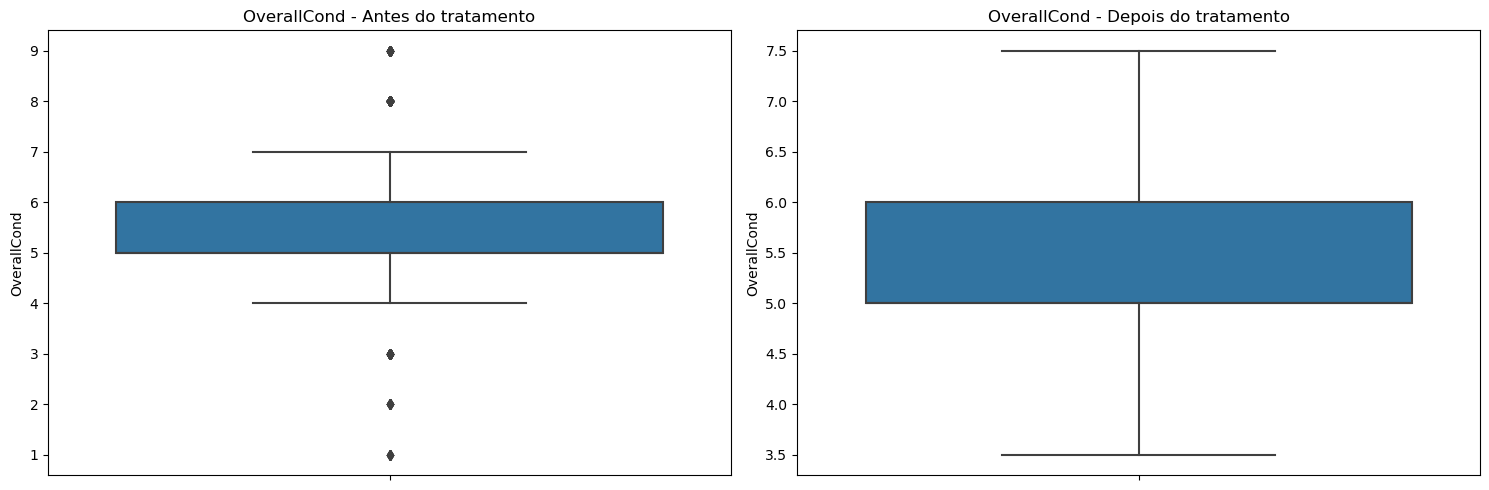

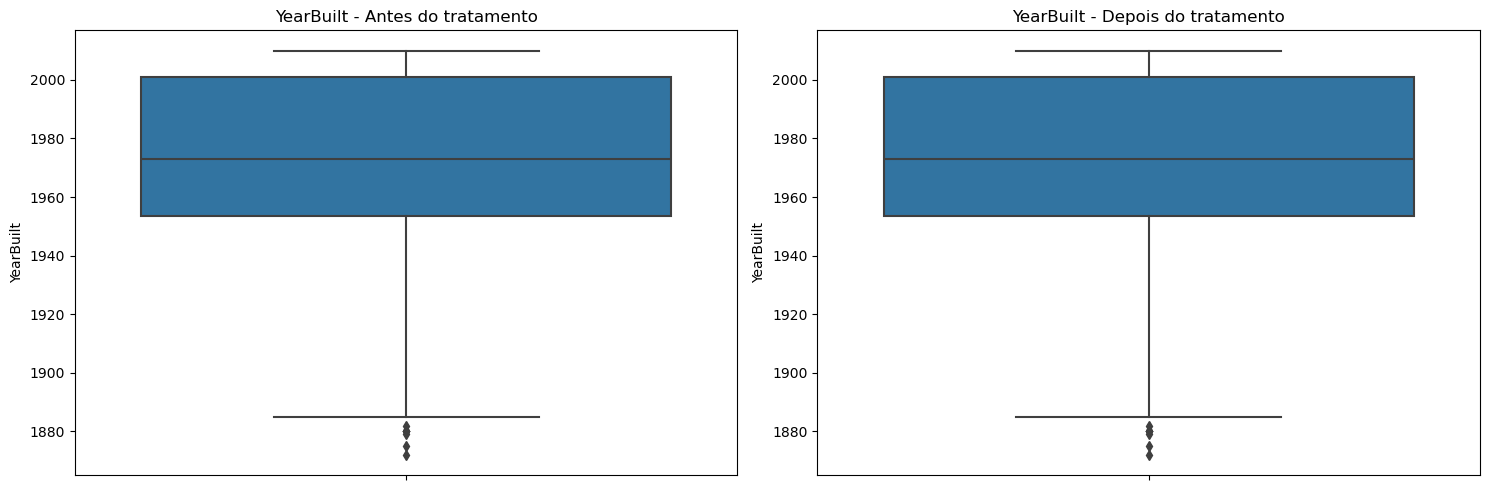

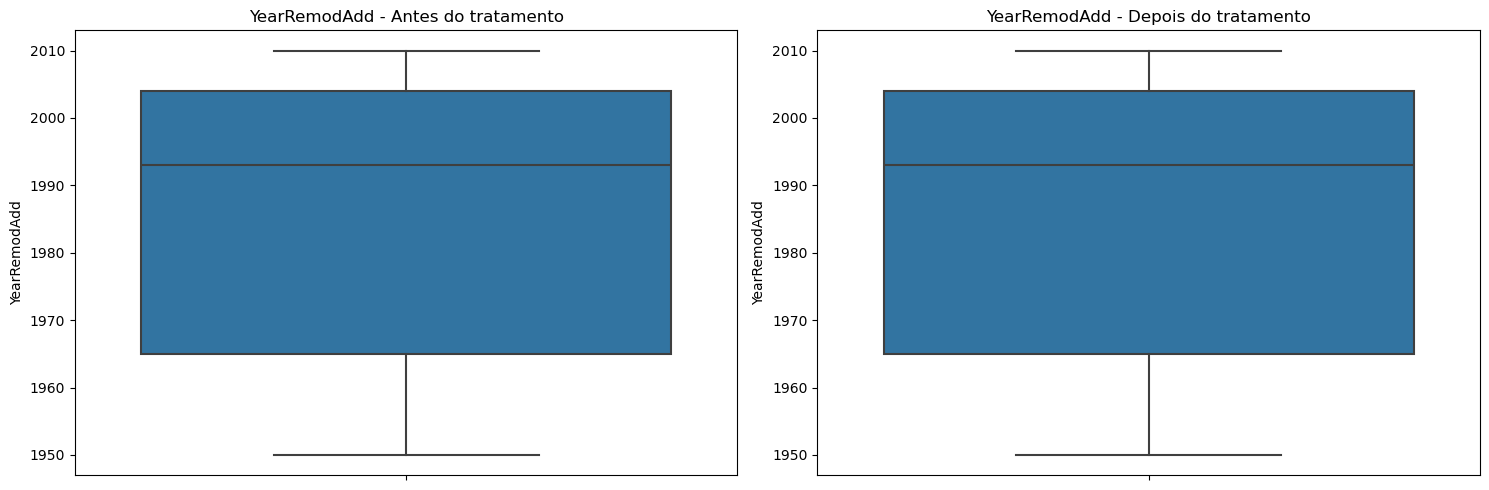

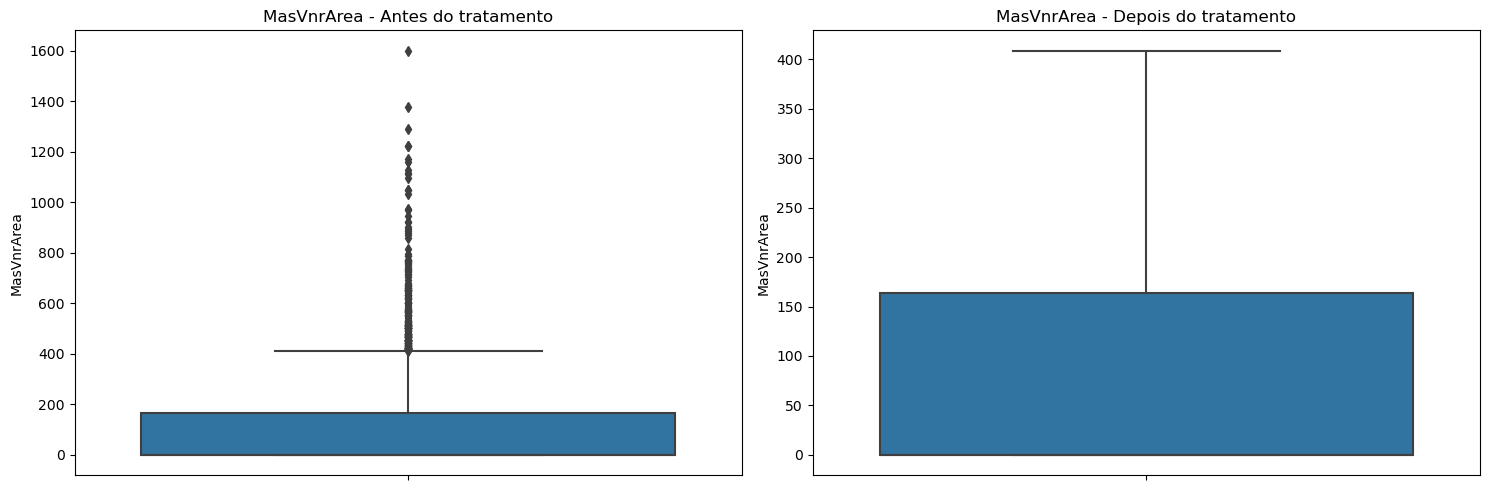

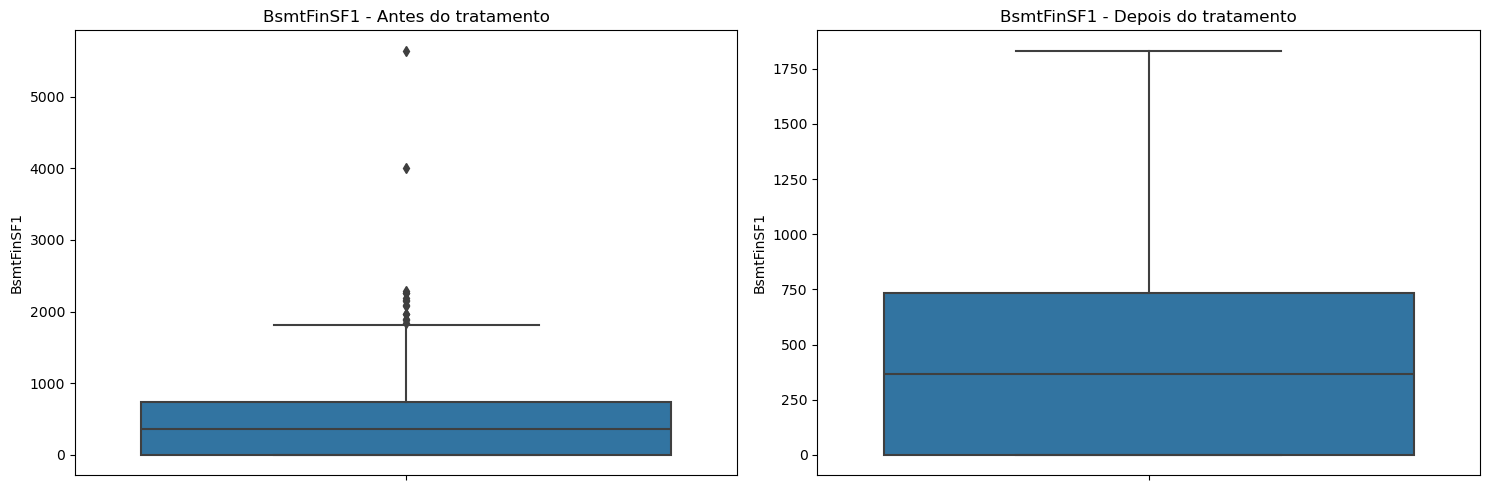

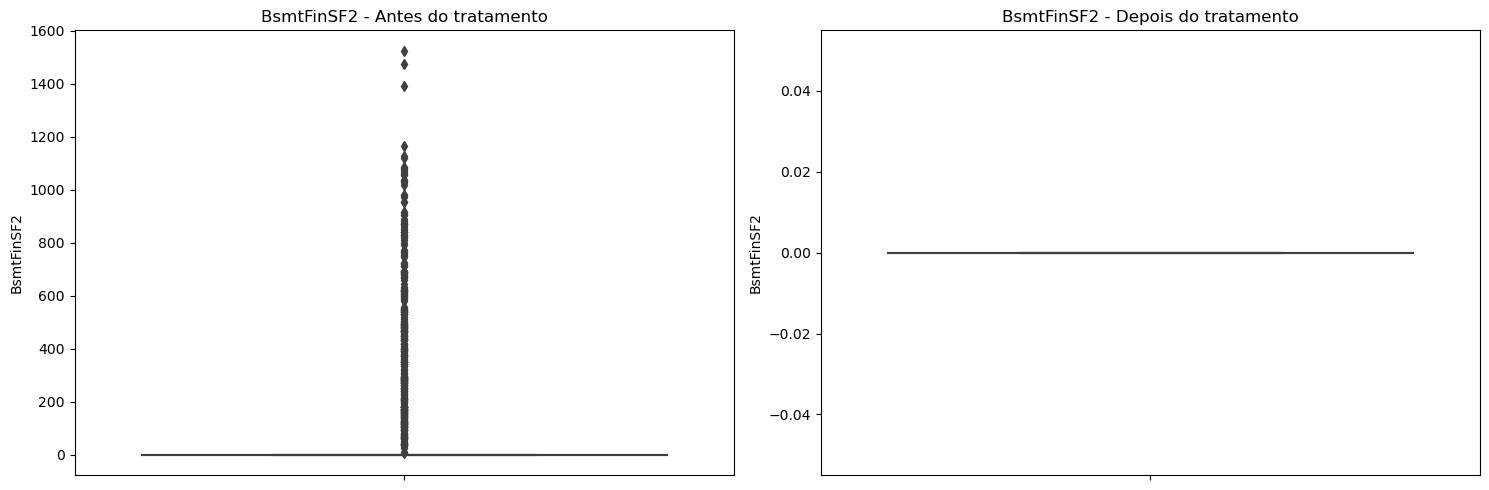

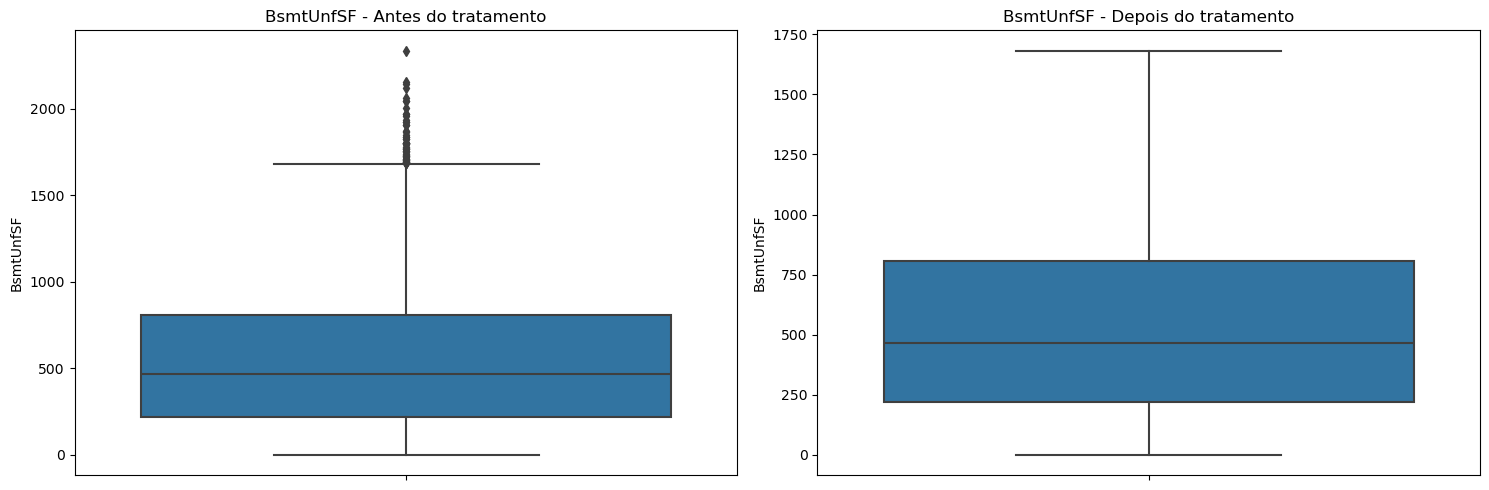

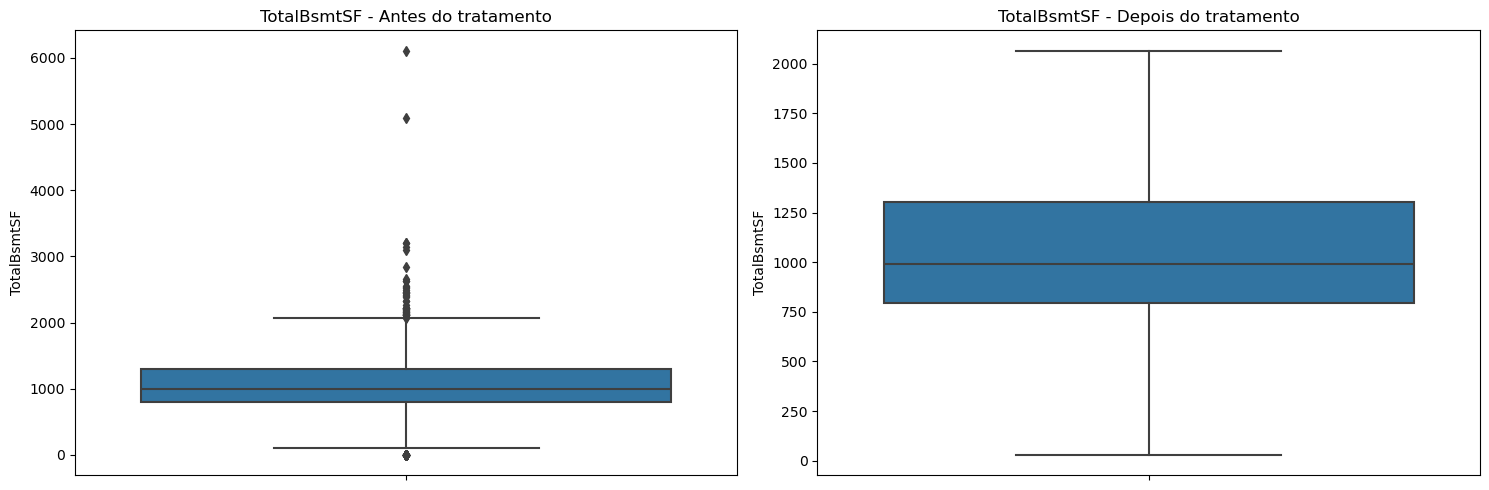

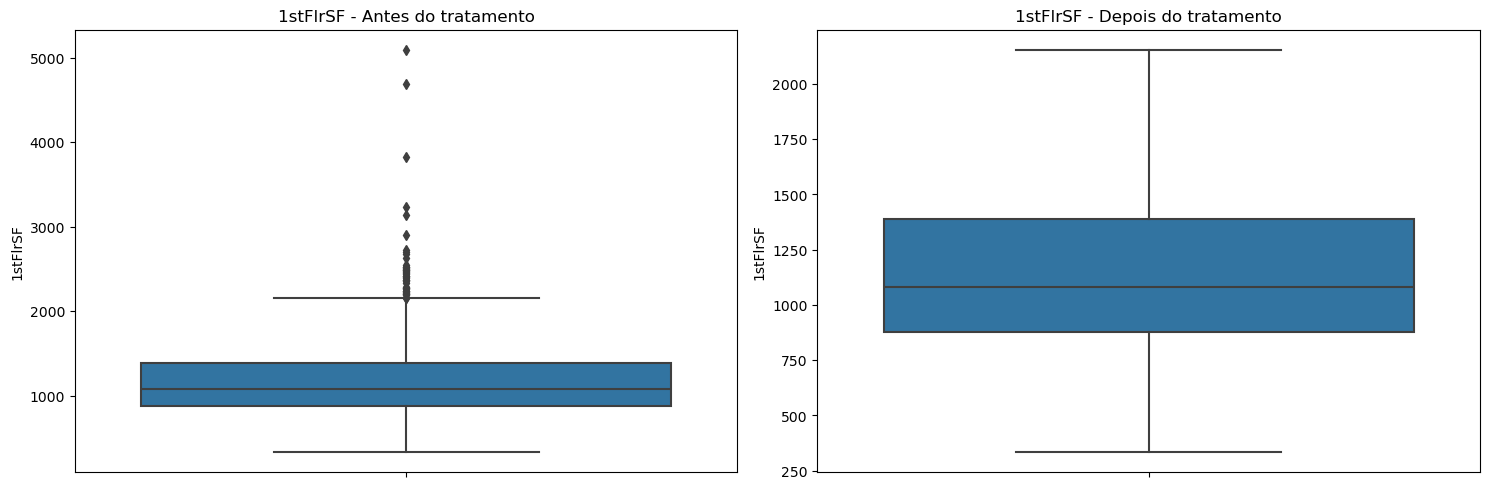

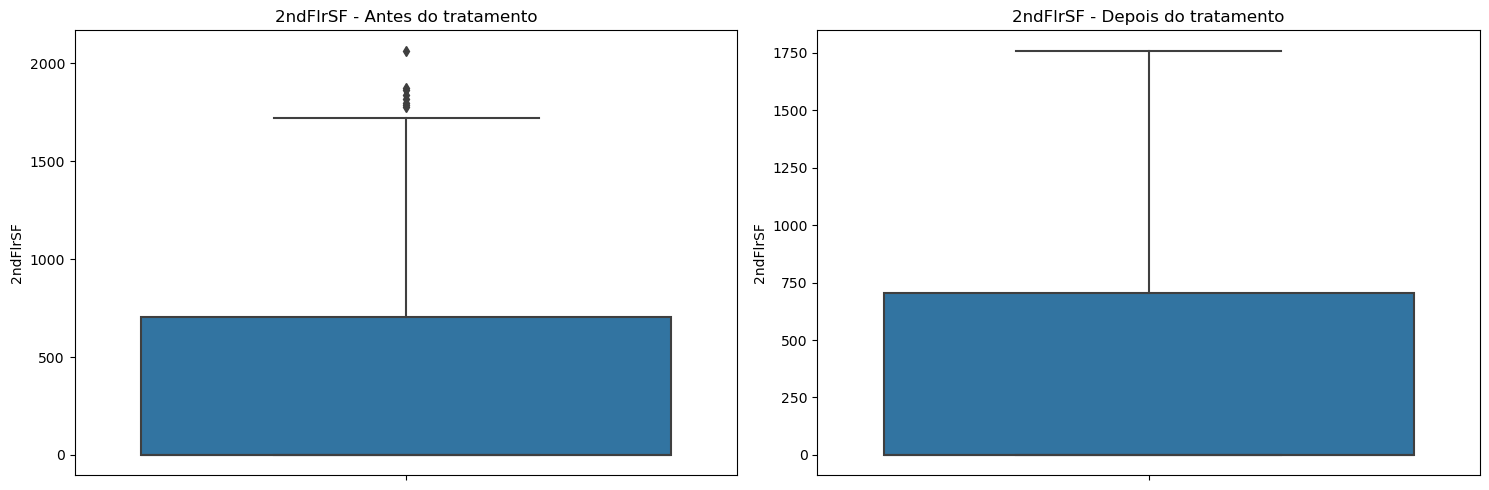

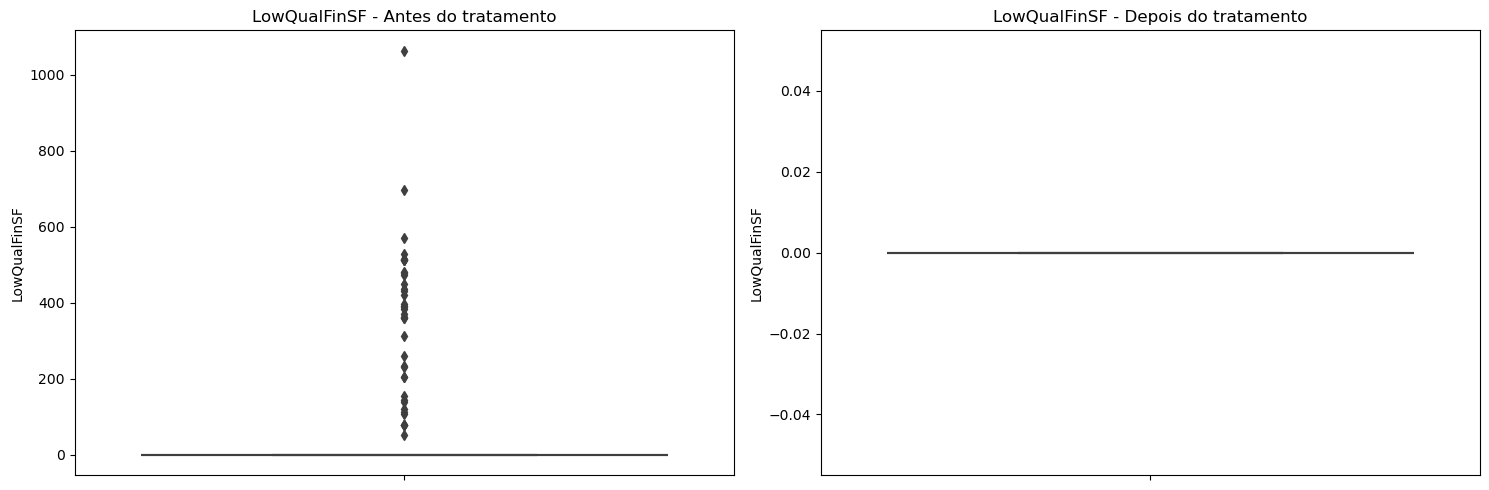

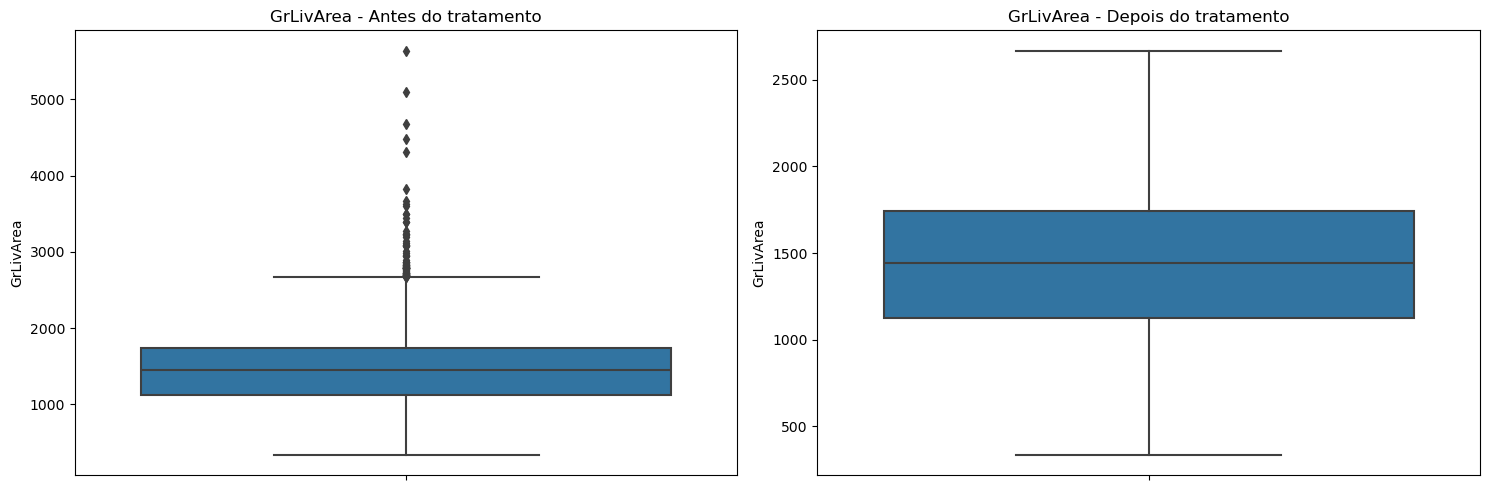

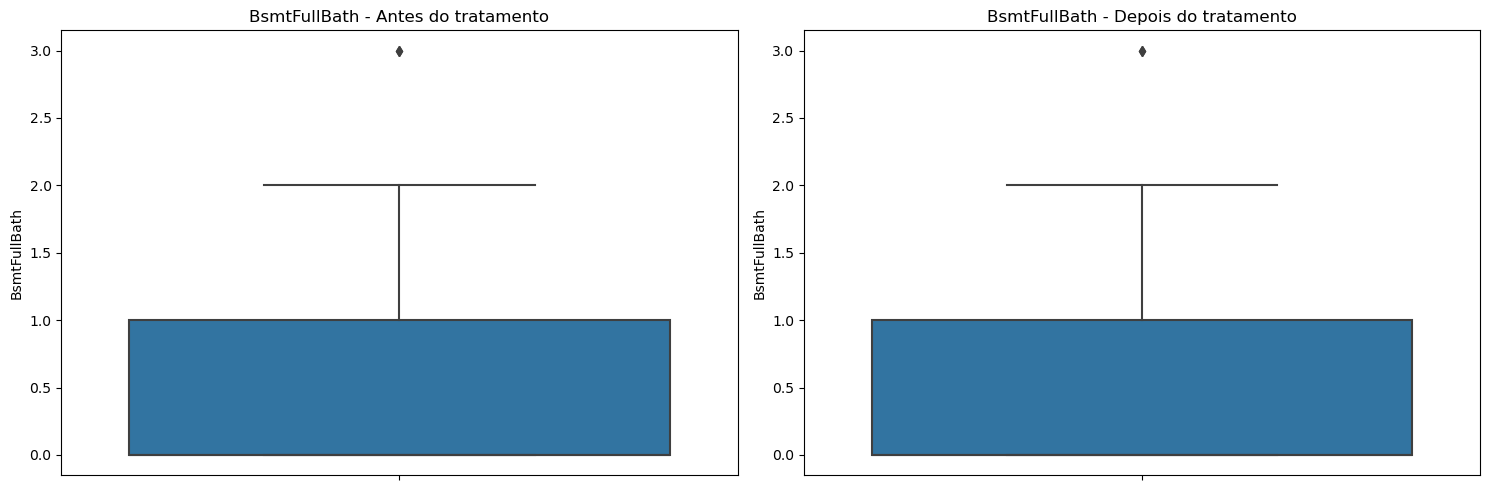

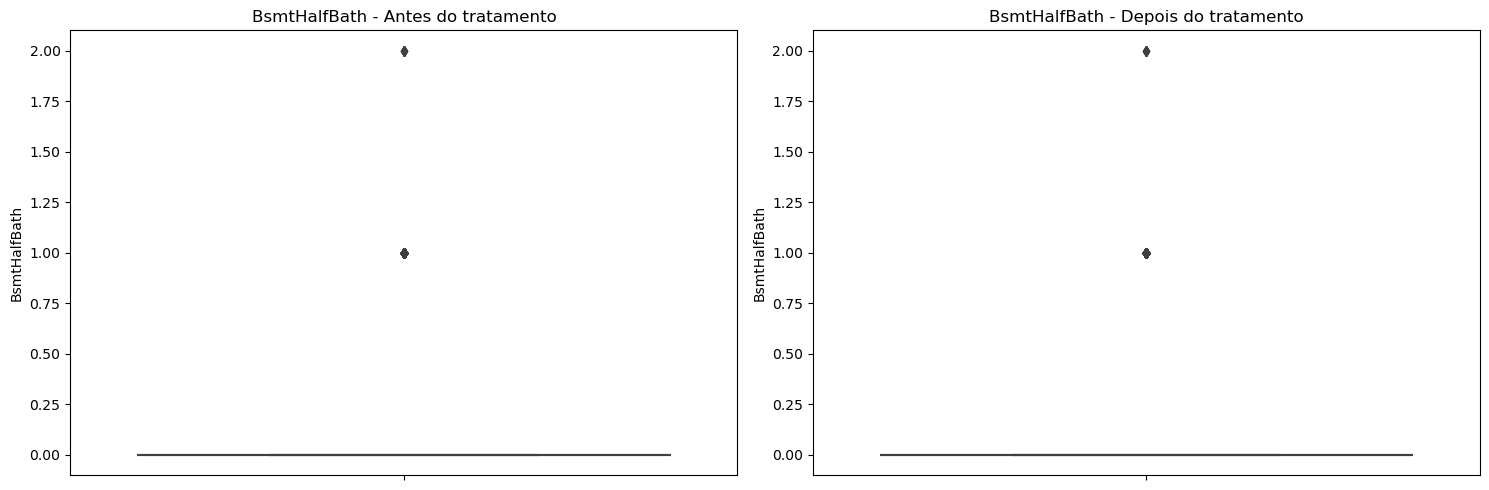

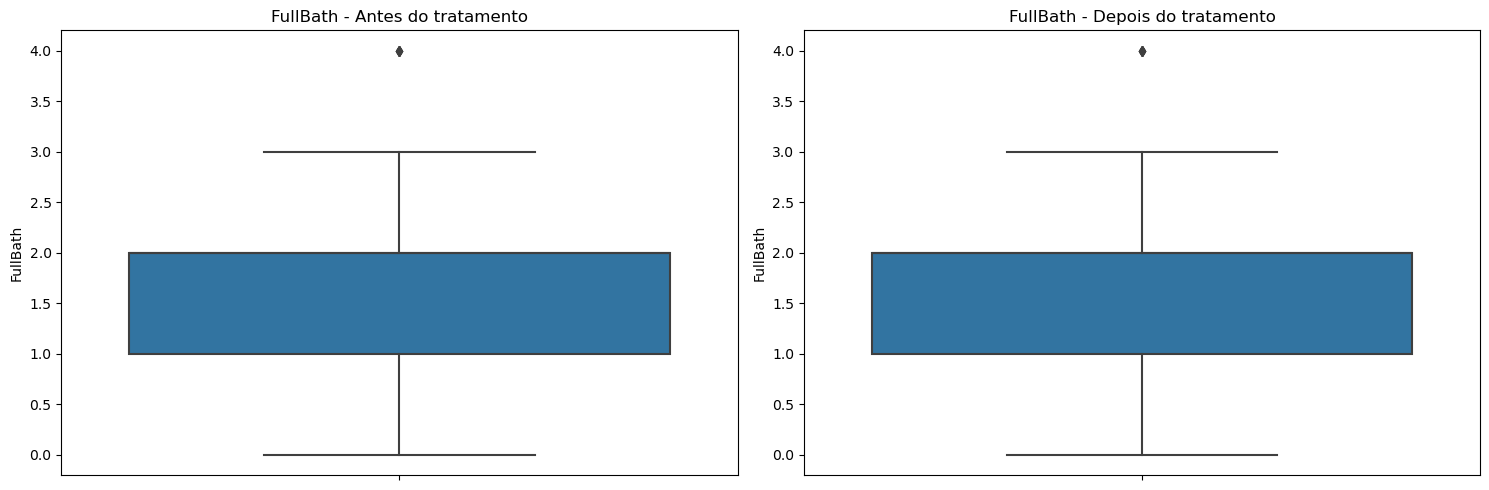

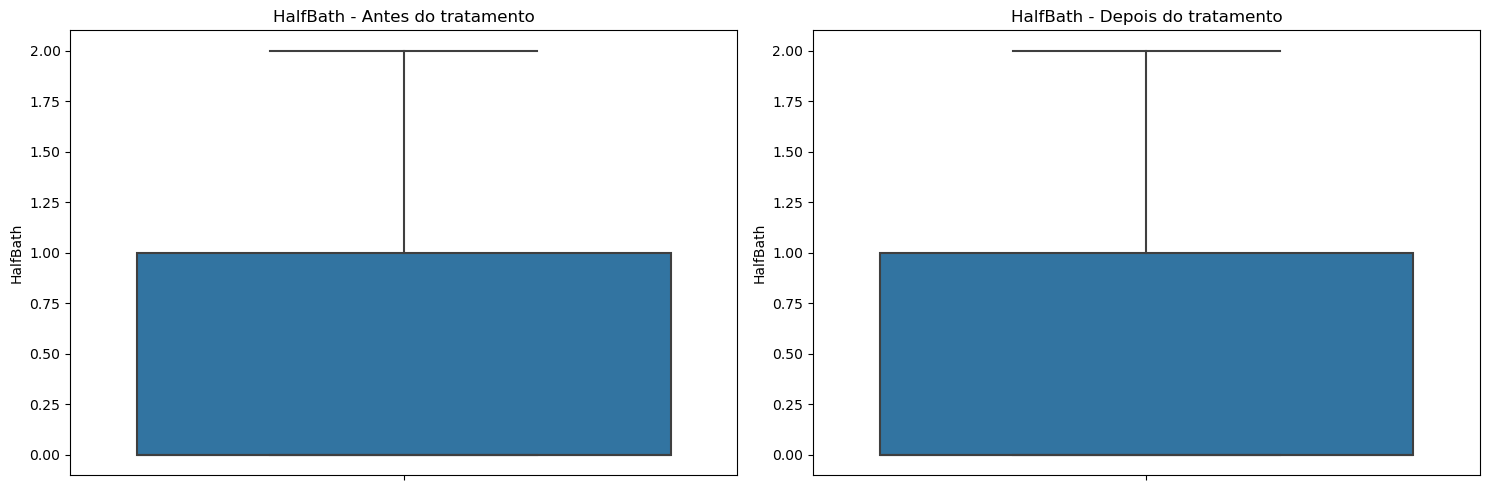

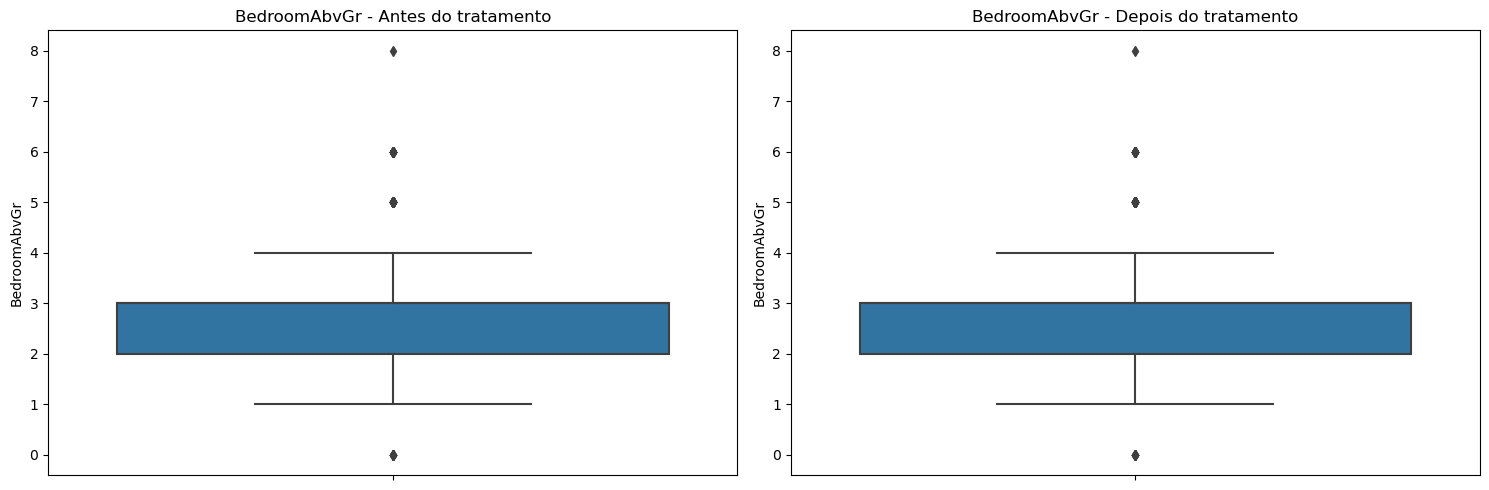

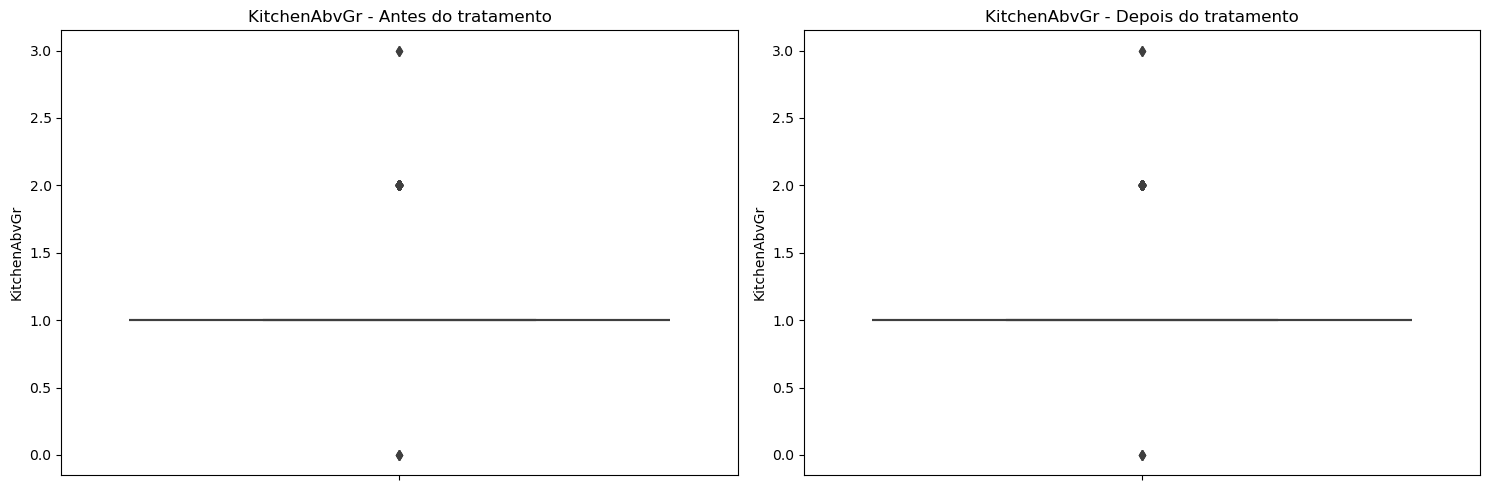

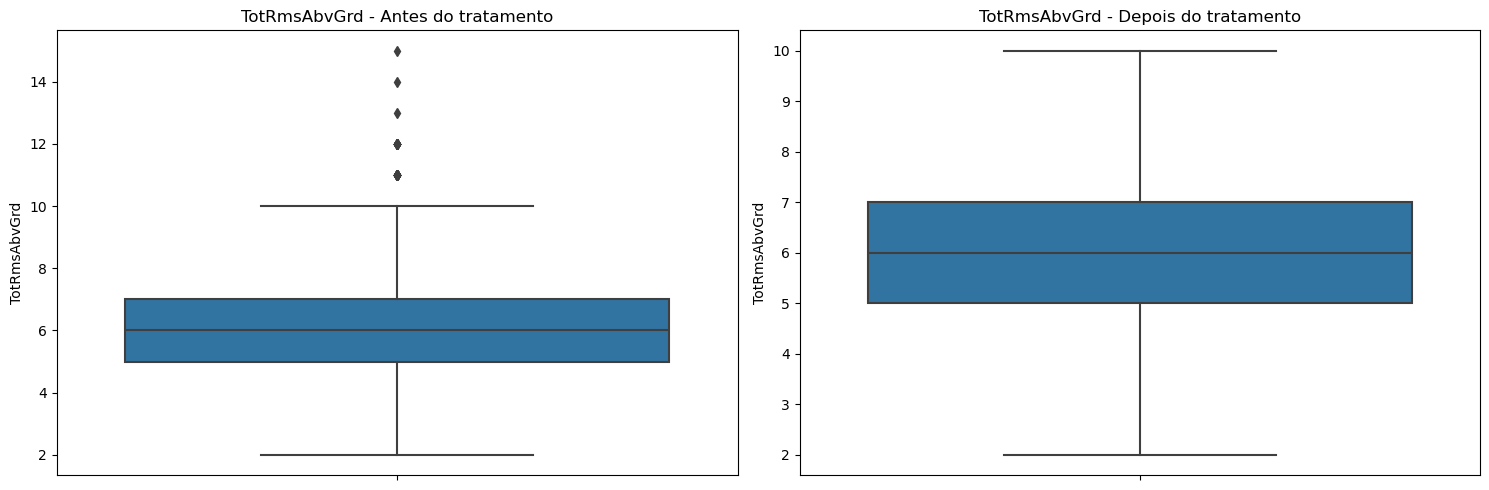

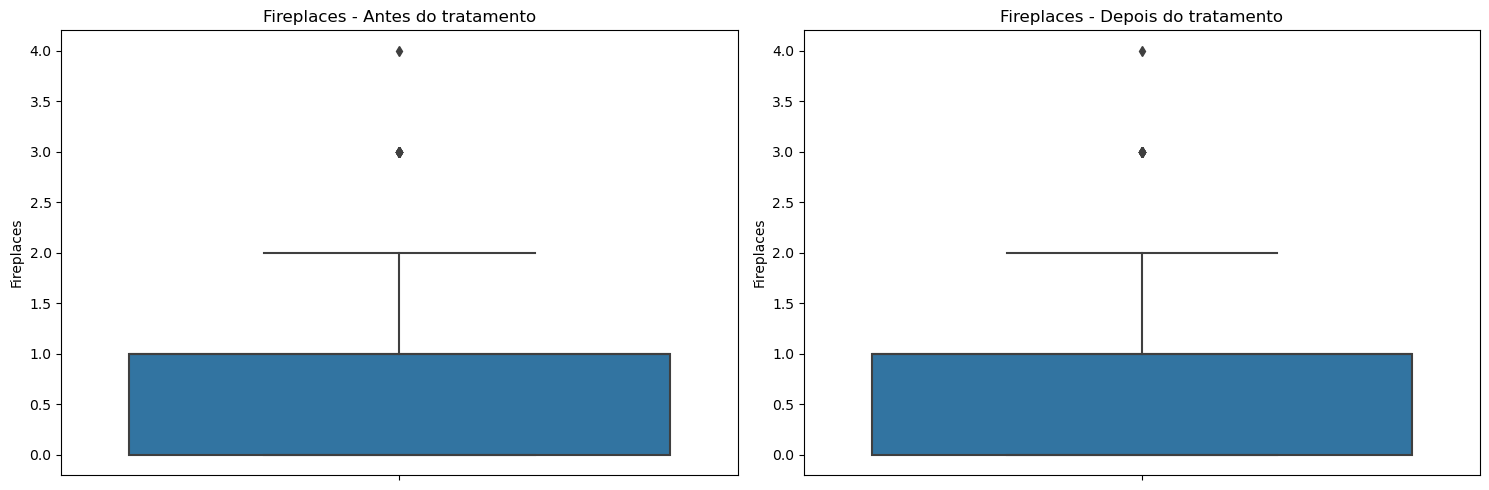

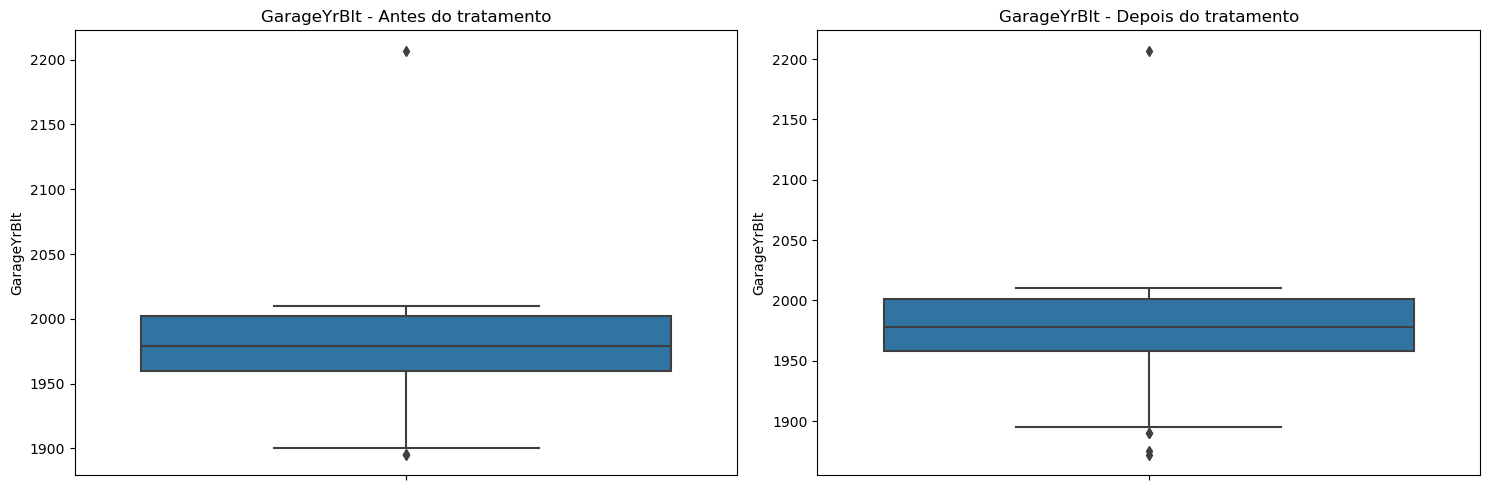

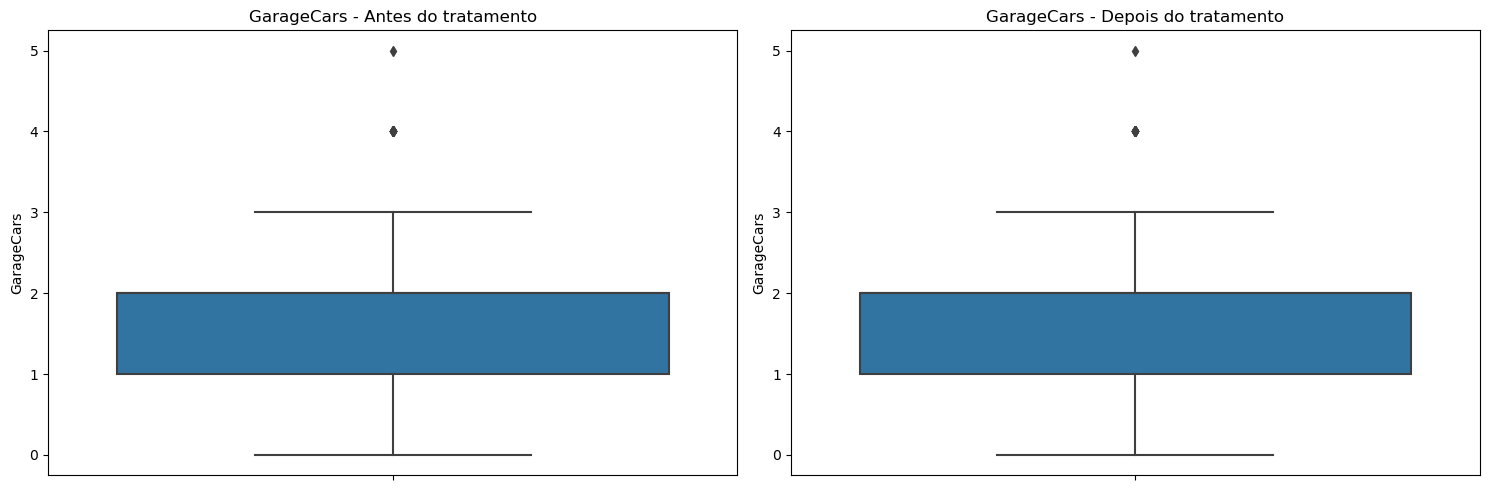

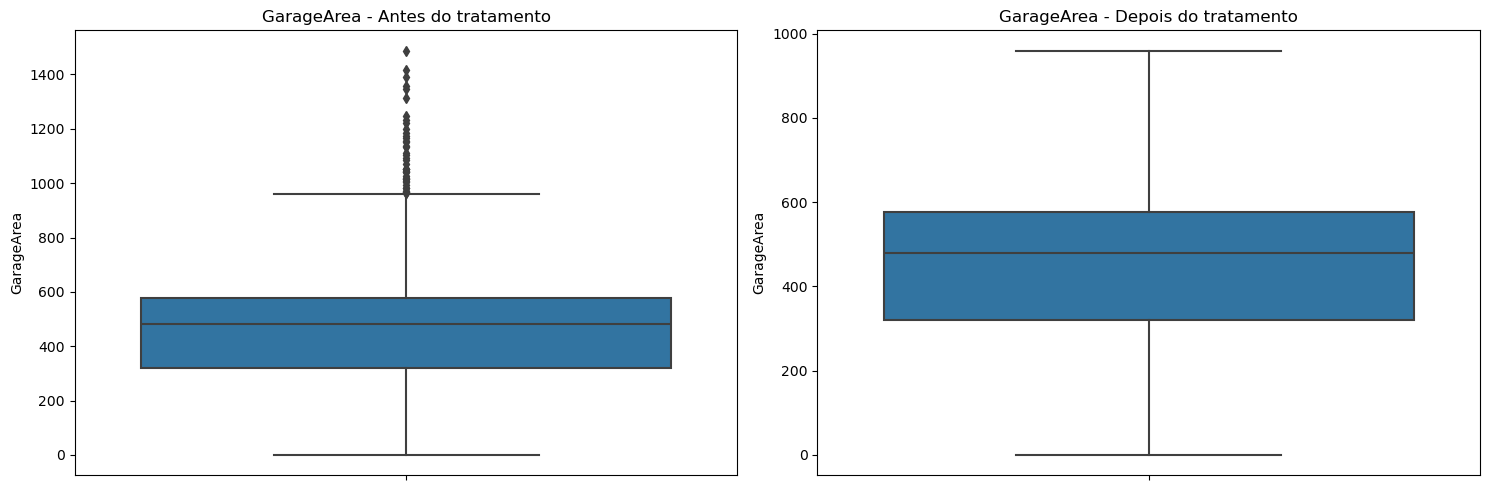

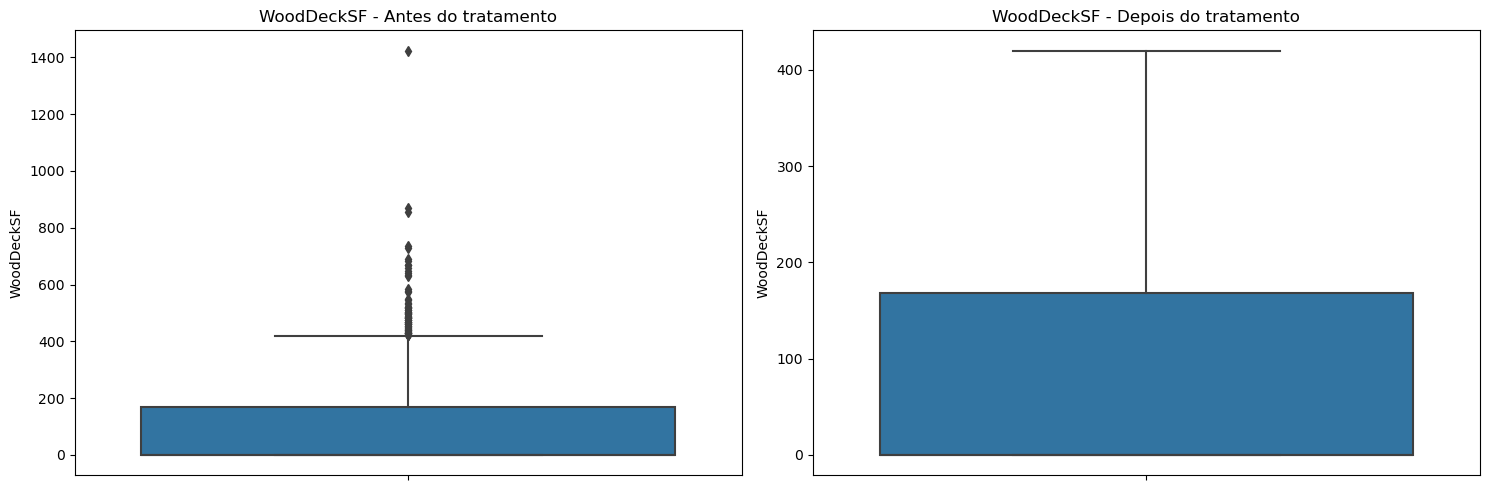

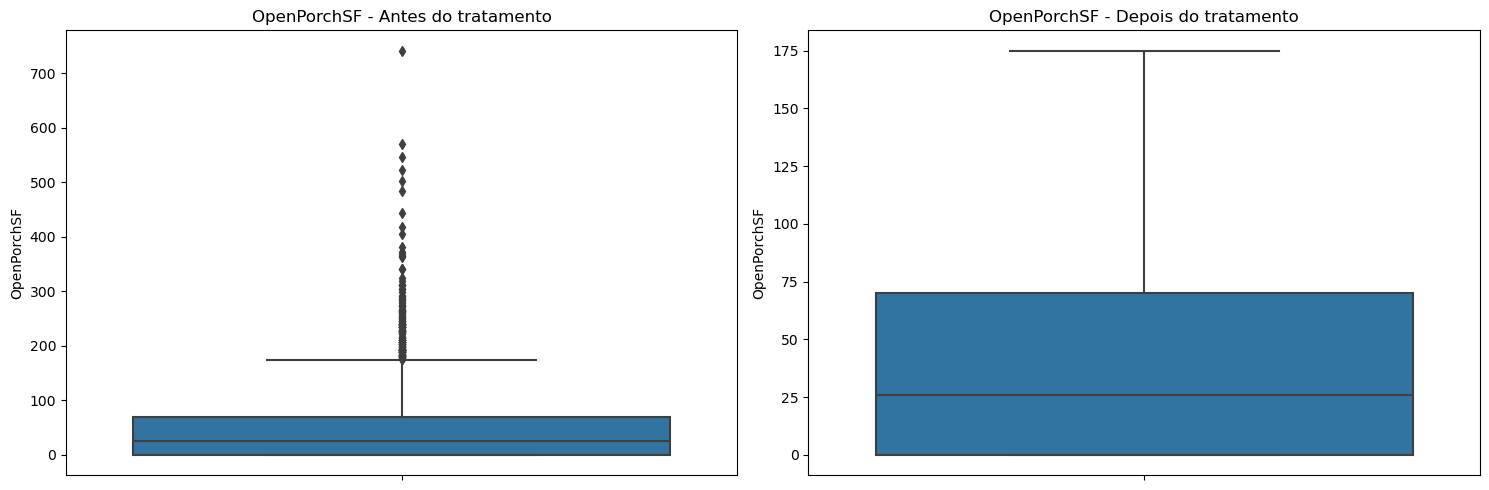

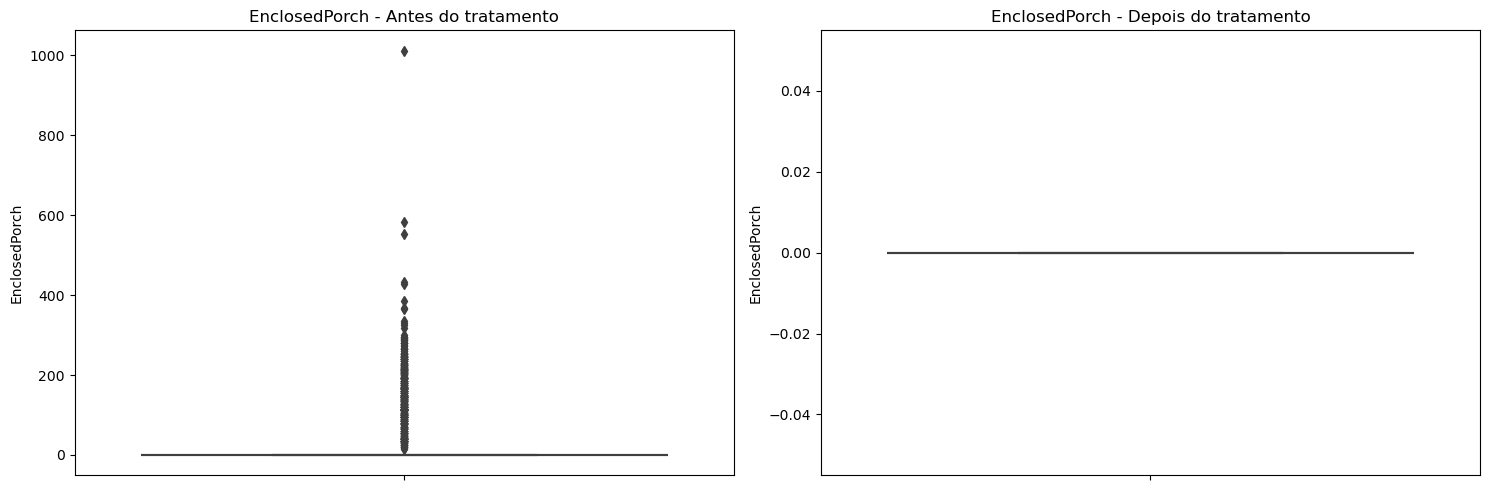

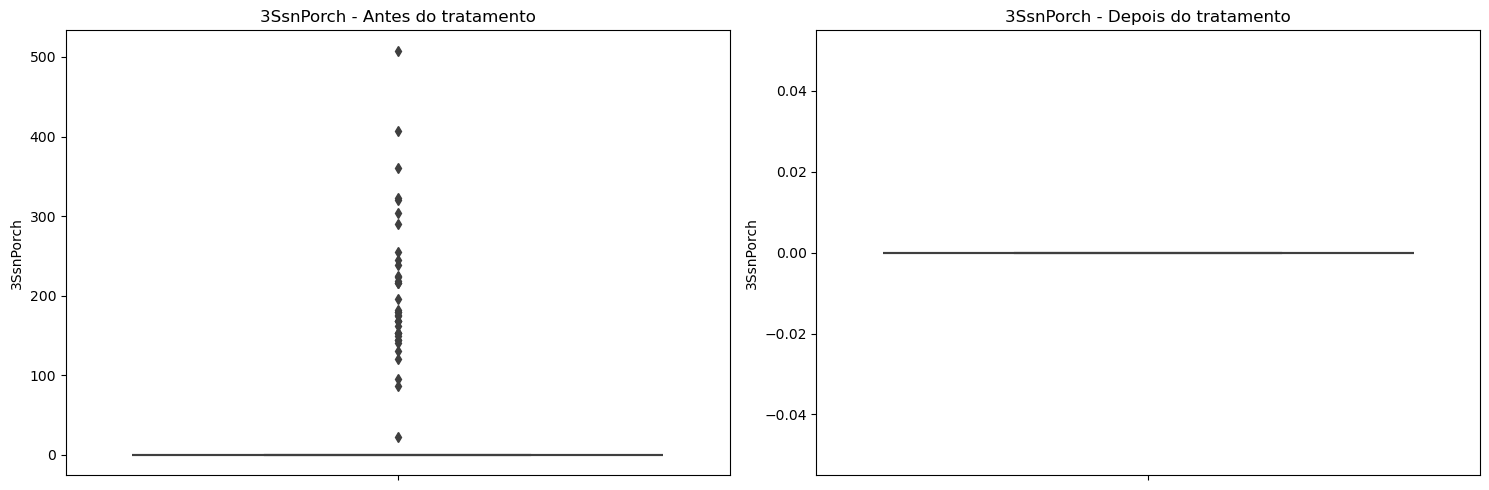

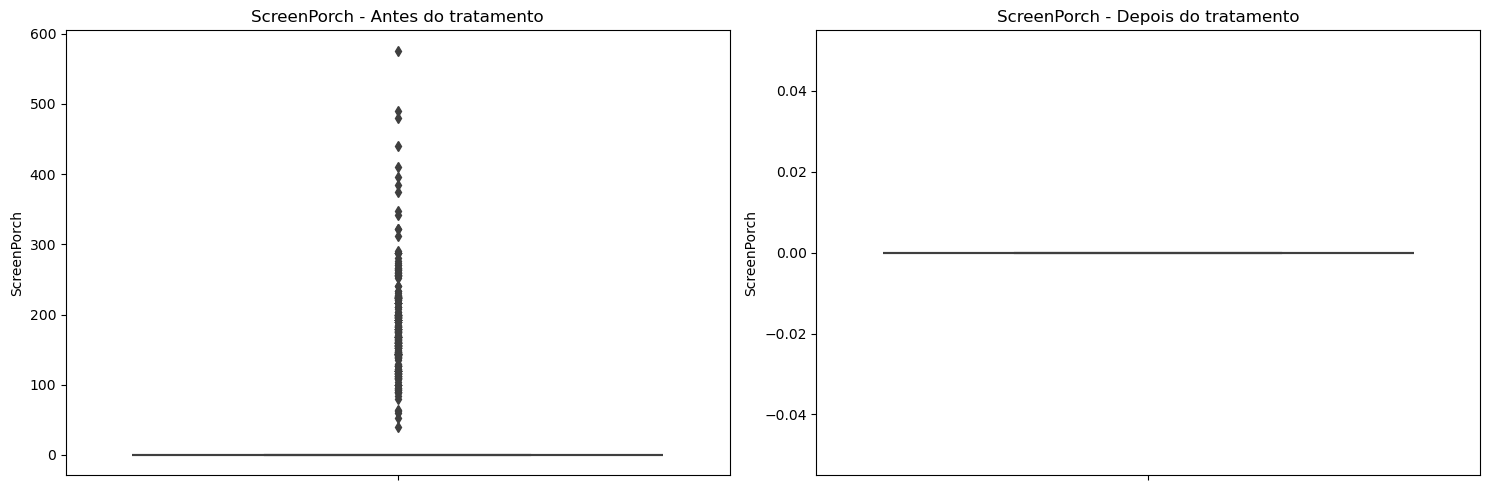

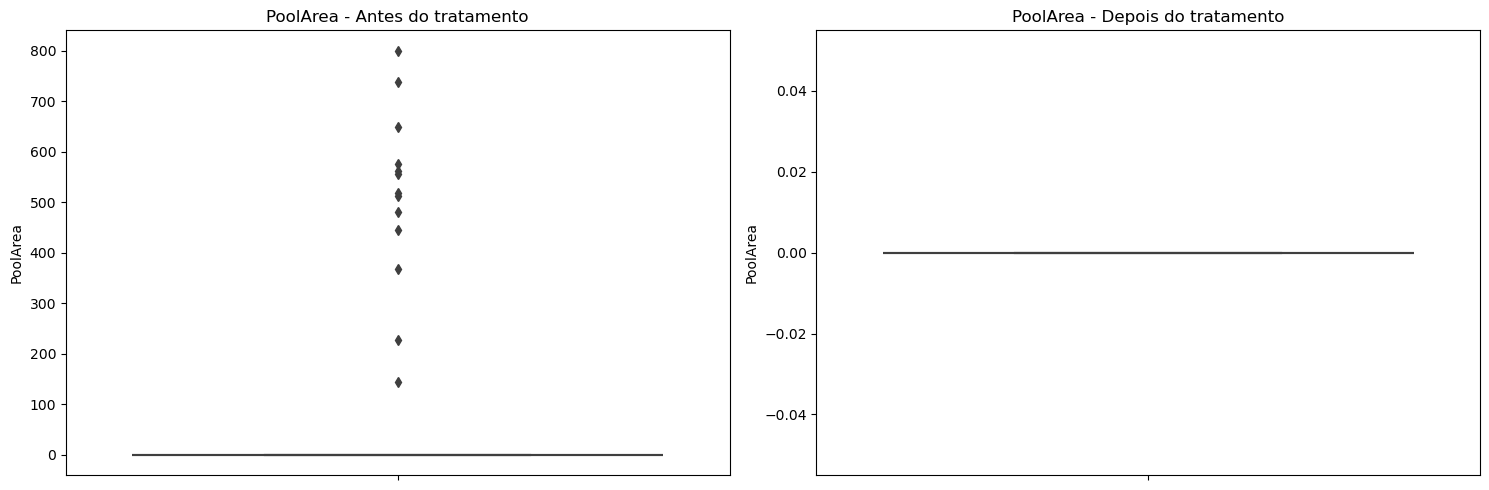

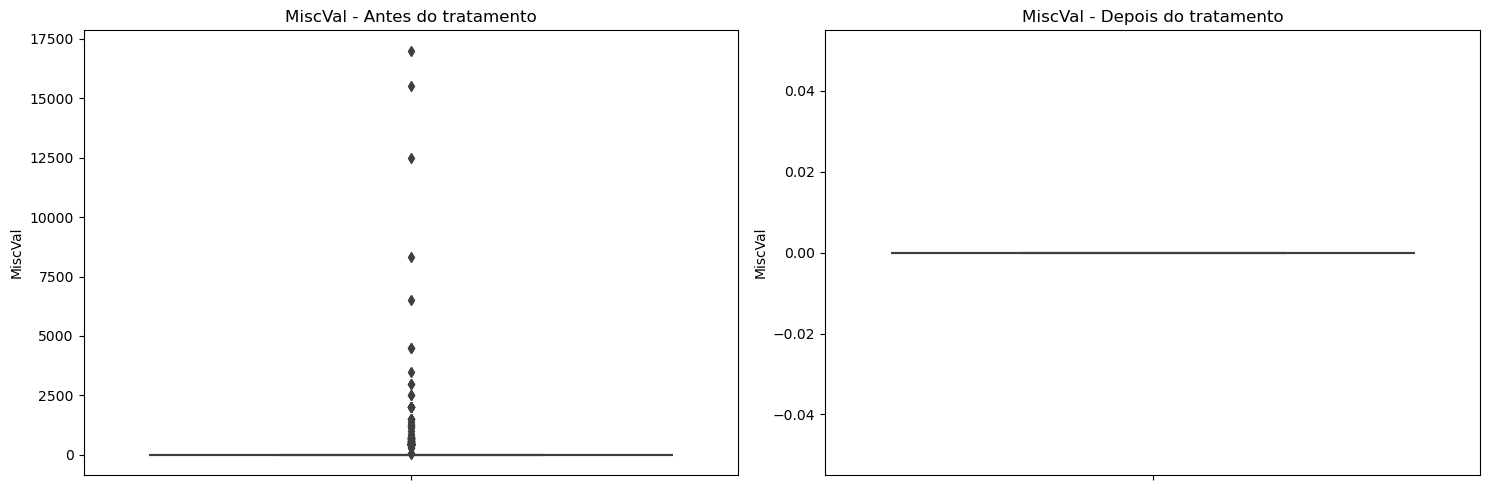

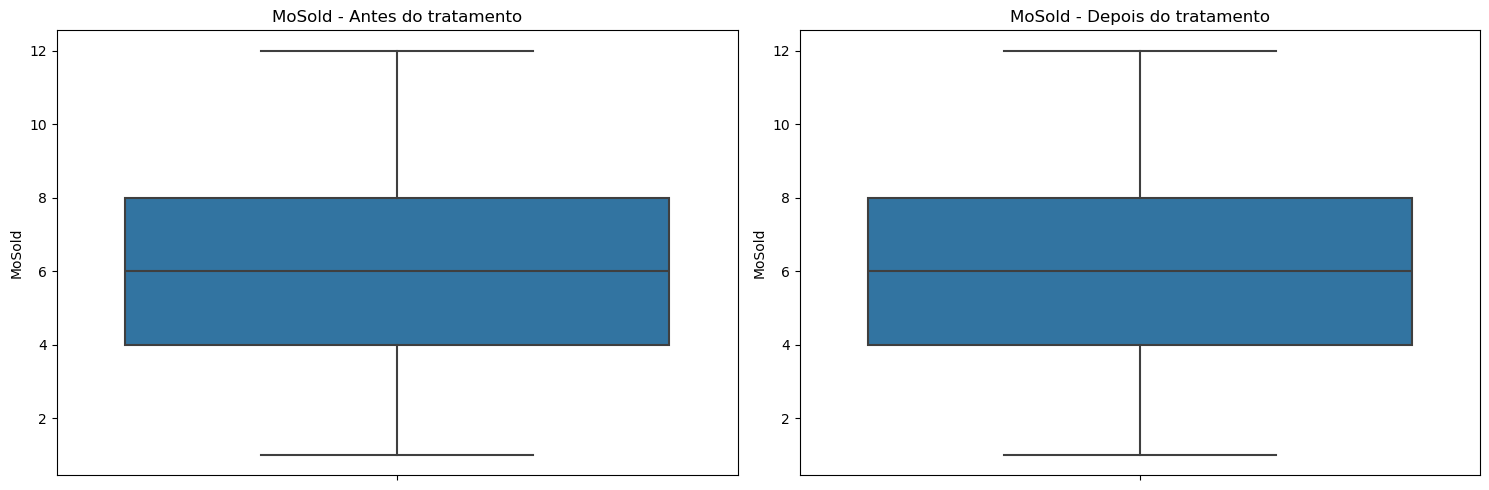

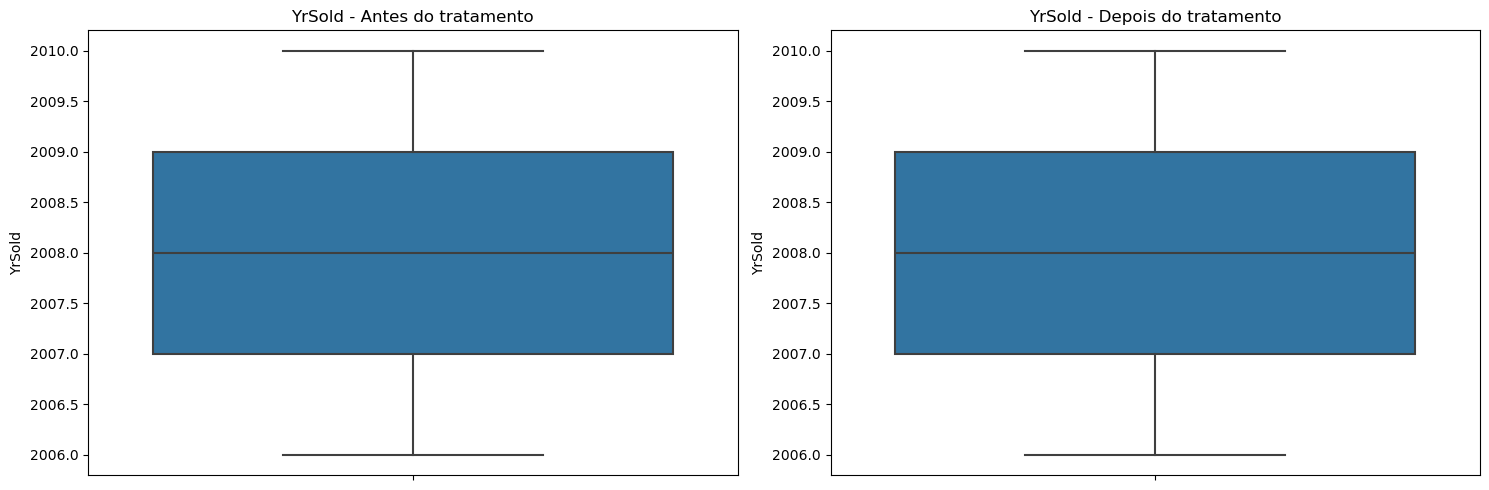

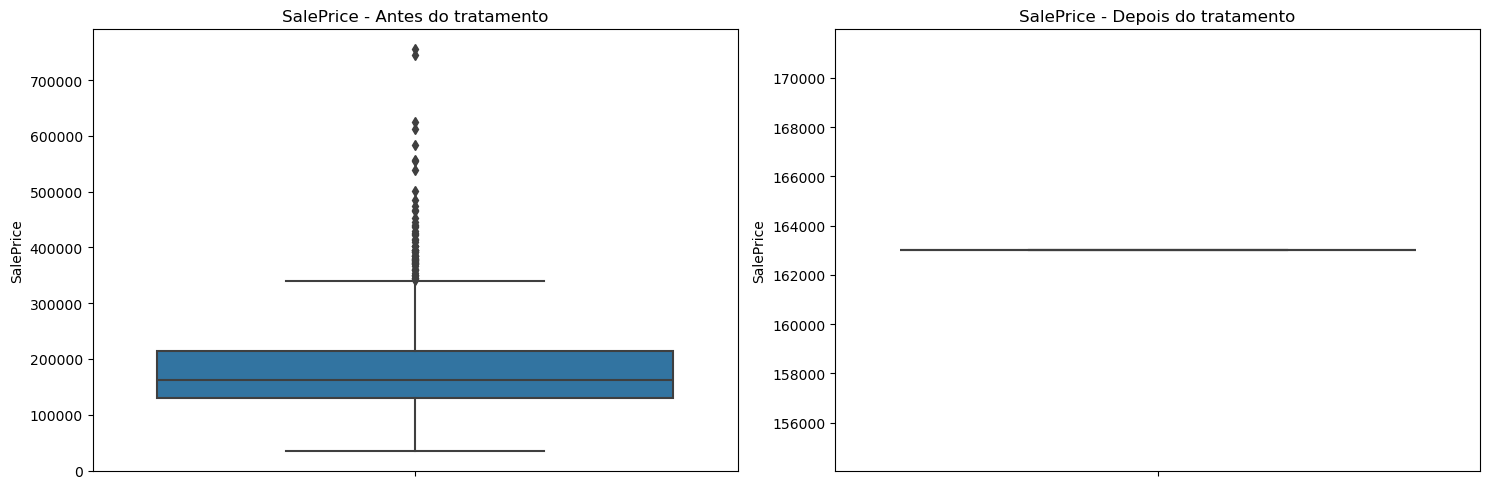

In [12]:
for coluna in coluna_number:
    visualizar_tratamento_v2(df_concat, df_tratado, coluna)

### **Tratamento dos dados do tipo Object**

In [13]:
def identificar_colunas_categoricas(df):
    categoricas = df.select_dtypes(include=['object']).columns
    return list(categoricas)


def tratar_colunas_categoricas(df):

    colunas_categoricas = identificar_colunas_categoricas(df)

    df_tratado = df.copy()

    for coluna in colunas_categoricas:
        n_valores_unicos = df[coluna].nunique()

        if n_valores_unicos == 2:
            le = LabelEncoder()
            df_tratado[coluna] = le.fit_transform(df_tratado[coluna].astype(str))
        elif n_valores_unicos <= 10:
            df_tratado = pd.get_dummies(df_tratado, columns=[coluna])
        else:
            le = LabelEncoder()
            df_tratado[coluna] = le.fit_transform(df_tratado[coluna].astype(str))
    
    return df_tratado


def tratar_valores_ausentes_categoricos(df):
    df_tratado = df.copy()

    for coluna in df.select_dtypes(include=['object']).columns:
        moda = df[coluna].mode()[0]
        df_tratado[coluna] = df_tratado[coluna].fillna(moda)

    return df_tratado

In [14]:
def definir_tipo_encoding():
    encoding_map = {
        'ordinal': {
            'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade externa
            'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Condição externa
            'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade do porão
            'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Condição do porão
            'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade do aquecimento
            'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade da cozinha
            'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade da lareira
            'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade da garagem
            'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Condição da garagem
            'PoolQC': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Qualidade da piscina
            'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],  # Forma do lote (mais irregular para mais regular)
            'LandSlope': ['Sev', 'Mod', 'Gtl'],  # Inclinação do terreno
            'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],  # Exposição do porão
            'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Tipo de acabamento do porão 1
            'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Tipo de acabamento do porão 2
            'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Funcionalidade
            'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],  # Acabamento da garagem
        },
        
        'label': [
            'MSZoning',      # Zona
            'Street',        # Tipo de rua
            'Alley',        # Beco
            'LandContour',   # Contorno do terreno
            'Utilities',     # Utilidades
            'LotConfig',     # Configuração do lote
            'Neighborhood',  # Vizinhança
            'Condition1',    # Condição 1
            'Condition2',    # Condição 2
            'BldgType',      # Tipo de construção
            'HouseStyle',    # Estilo da casa
            'RoofStyle',     # Estilo do telhado
            'RoofMatl',      # Material do telhado
            'Exterior1st',   # Material exterior 1
            'Exterior2nd',   # Material exterior 2
            'MasVnrType',    # Tipo de alvenaria
            'Foundation',    # Fundação
            'Heating',       # Aquecimento
            'CentralAir',    # Ar central
            'Electrical',    # Sistema elétrico
            'GarageType',    # Tipo de garagem
            'PavedDrive',    # Entrada pavimentada
            'Fence',         # Cerca
            'MiscFeature',   # Característica diversa
            'SaleType',      # Tipo de venda
            'SaleCondition'  # Condição de venda
        ]
    }
    return encoding_map

def identificar_colunas_categoricas(df):
    categoricas = df.select_dtypes(include=['object']).columns
    return list(categoricas)

def tratar_colunas_categoricas(df):
    df_tratado = df.copy()
    encoding_map = definir_tipo_encoding()
    colunas_categoricas = identificar_colunas_categoricas(df)
    
    for coluna in colunas_categoricas:
        if coluna in encoding_map['ordinal']:
            if 'NA' in encoding_map['ordinal'][coluna]:
                df_tratado[coluna] = df_tratado[coluna].fillna('NA')
            
            oe = OrdinalEncoder(categories=[encoding_map['ordinal'][coluna]])
            df_tratado[coluna] = oe.fit_transform(df_tratado[[coluna]])
            
        elif coluna in encoding_map['label']:
            le = LabelEncoder()
            df_tratado[coluna] = df_tratado[coluna].fillna('NA')
            df_tratado[coluna] = le.fit_transform(df_tratado[coluna].astype(str))
    
    return df_tratado

def tratar_valores_ausentes_categoricos(df):
    df_tratado = df.copy()
    
    for coluna in df.select_dtypes(include=['object']).columns:
        moda = df[coluna].mode()[0]
        df_tratado[coluna] = df_tratado[coluna].fillna(moda)
    
    return df_tratado

def tratar_lot_frontage(df):
    df_tratado = df.copy()

    df_tratado['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median())
    )
    df_tratado['LotFrontage'] = df_tratado['LotFrontage'].fillna(df['LotFrontage'].median())

    return df_tratado

### **Visualização**

In [28]:
def visualizar_tratamentos(df_original, df_tratado, colunas=None):
    if colunas is None:
        colunas = df_original.select_dtypes(include=['object']).columns

    for coluna in colunas:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(f'Distribuição da coluna: {coluna}')

        # Plot original
        if df_original[coluna].dtype == 'object':
            sns.countplot(data=df_original, x=coluna, ax=ax1)
        else:
            sns.histplot(data=df_original, x=coluna, ax=ax1)
        ax1.set_title('Dados Originais')
        ax1.set_ylabel('')

        nan_count = df_original[coluna].isna().sum()
        ax1.text(0.05, -0.1, f'NaN: {nan_count}', transform=ax1.transAxes, color='red')

        # plot tratado
        if df_tratado[coluna].dtype == 'object':
            sns.countplot(data=df_tratado, x=coluna, ax=ax2)
        else:
            sns.histplot(data=df_tratado, x=coluna, ax=ax2)
        ax2.set_title('Dados Tratados')
        ax2.set_ylabel('')

        nan_count_tratado = df_tratado[coluna].isna().sum()
        ax2.text(0.05, -0.1, f'NaN: {nan_count_tratado}', transform=ax2.transAxes, color='red')

        plt.tight_layout()
        plt.show()


c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


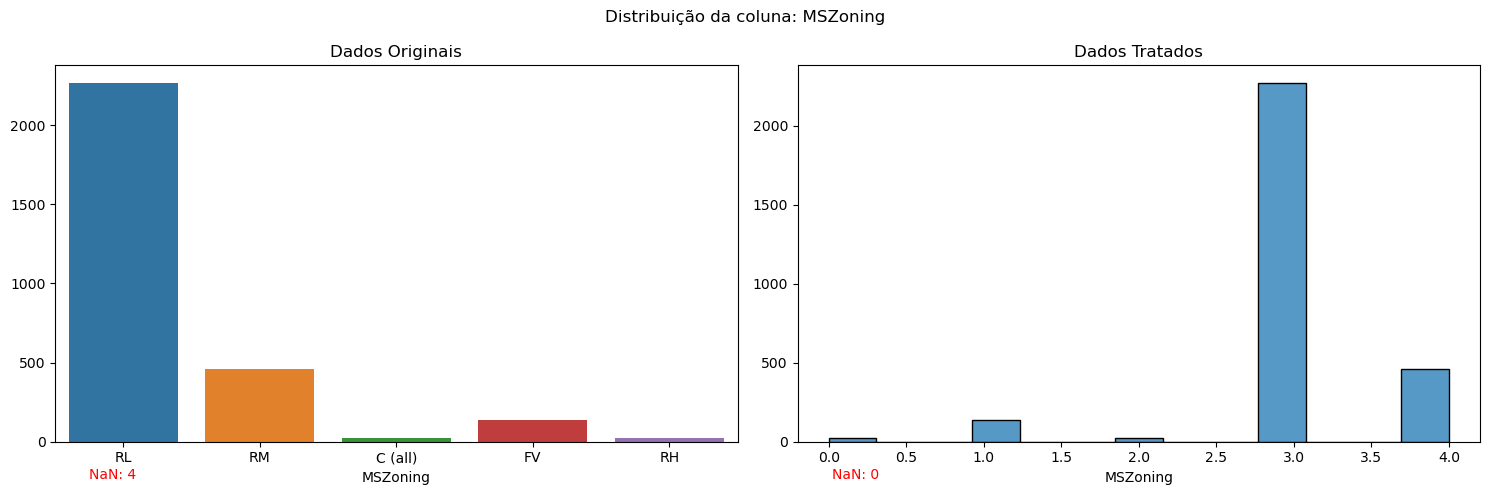

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


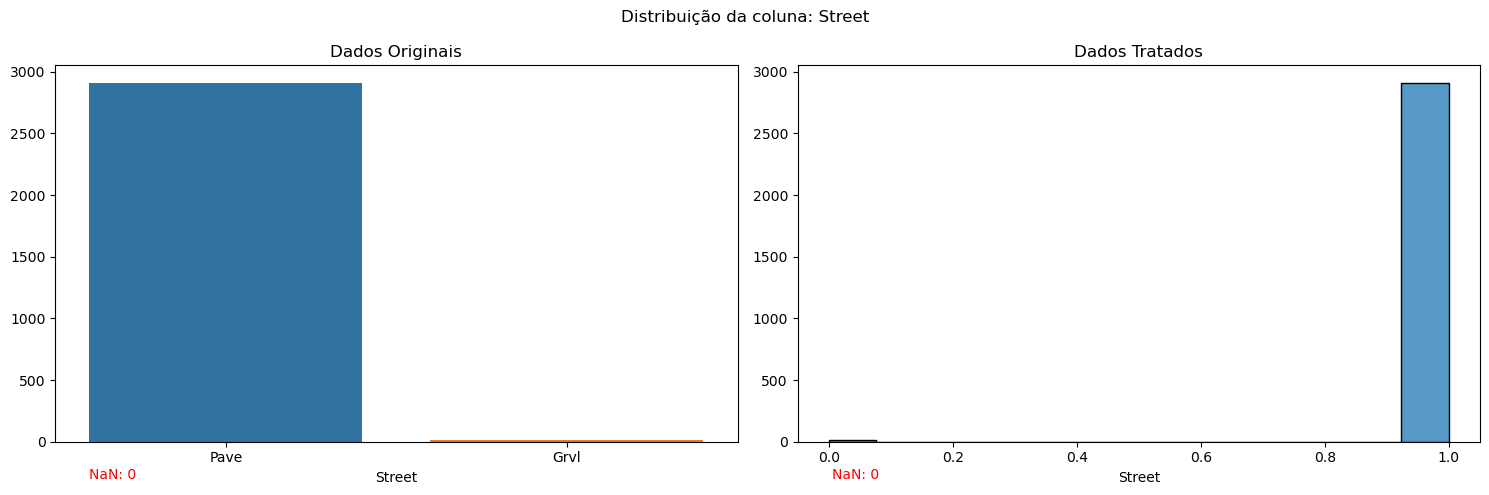

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


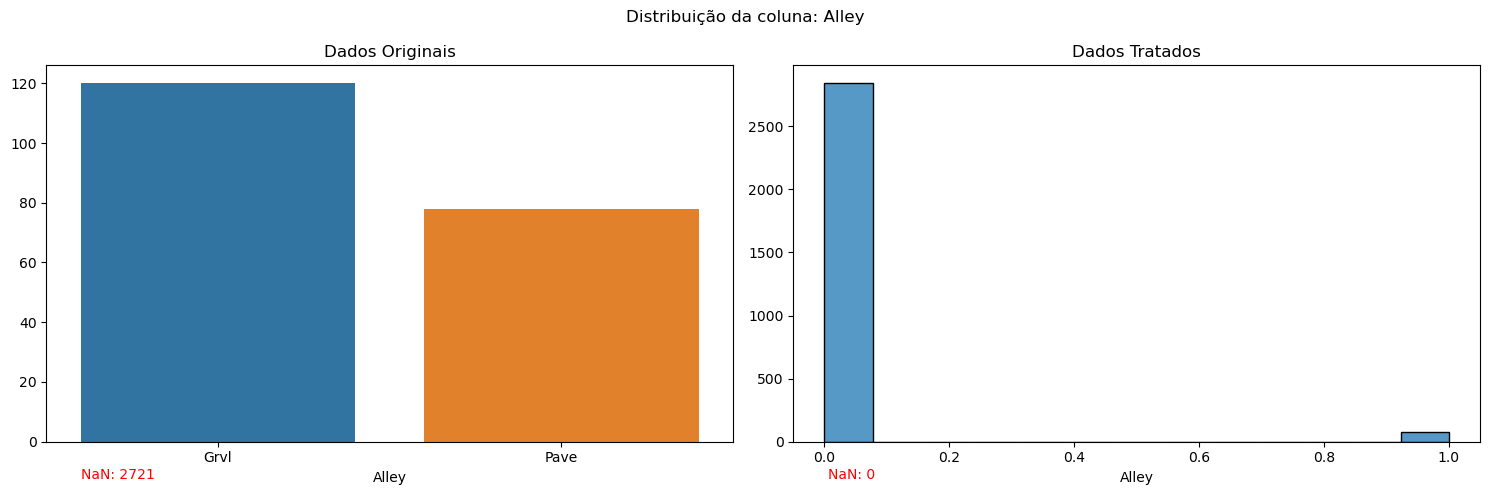

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


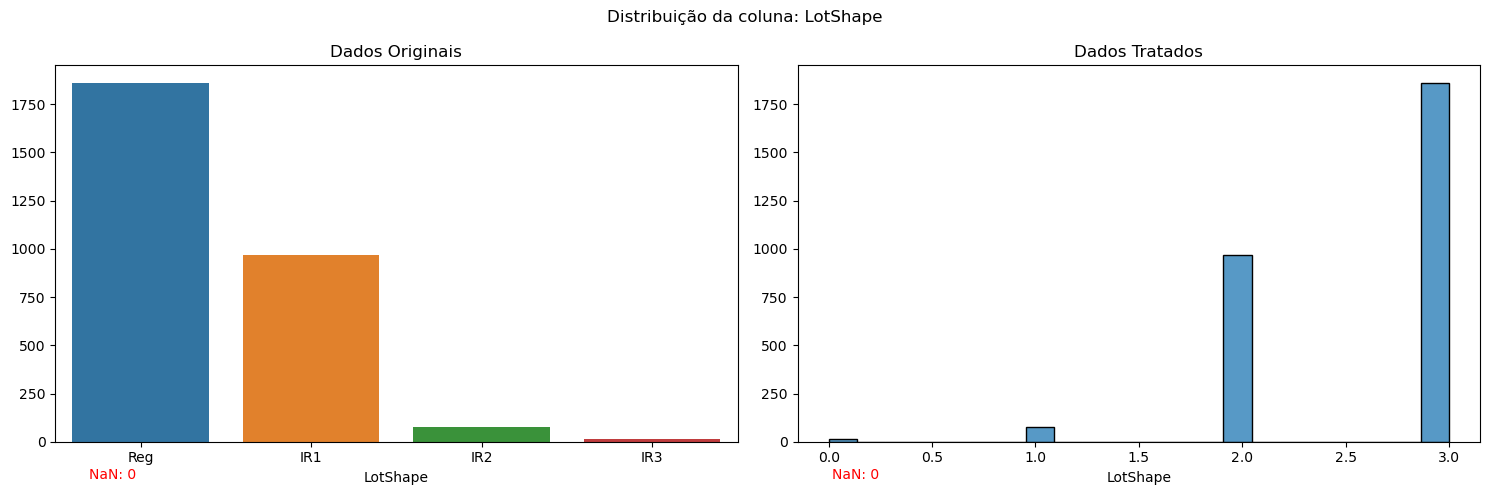

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


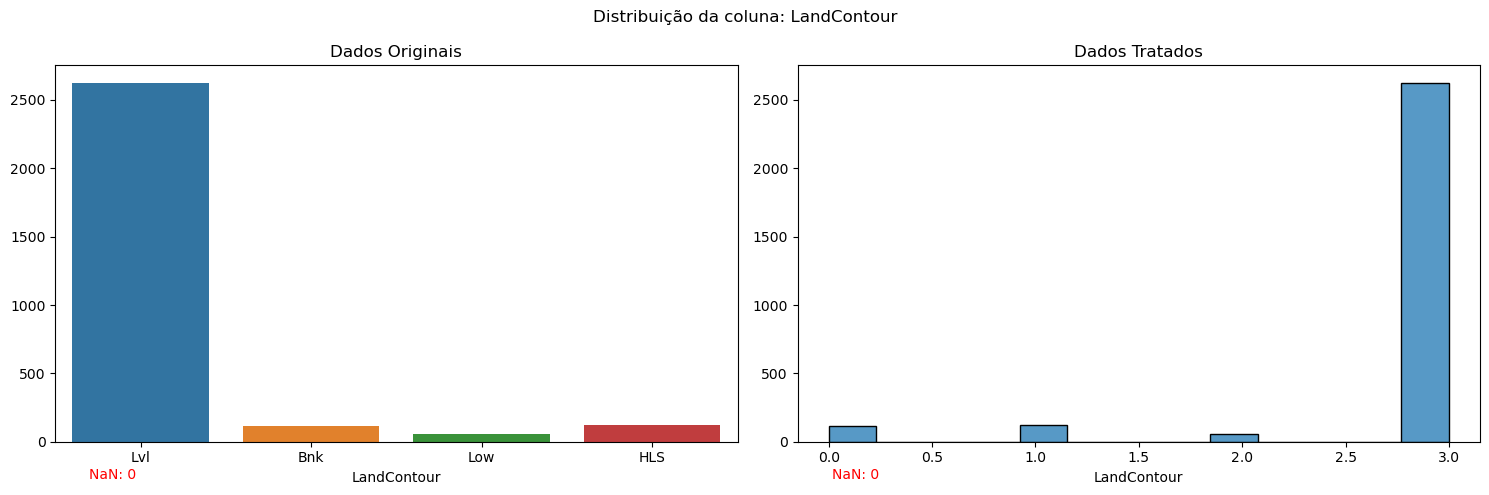

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


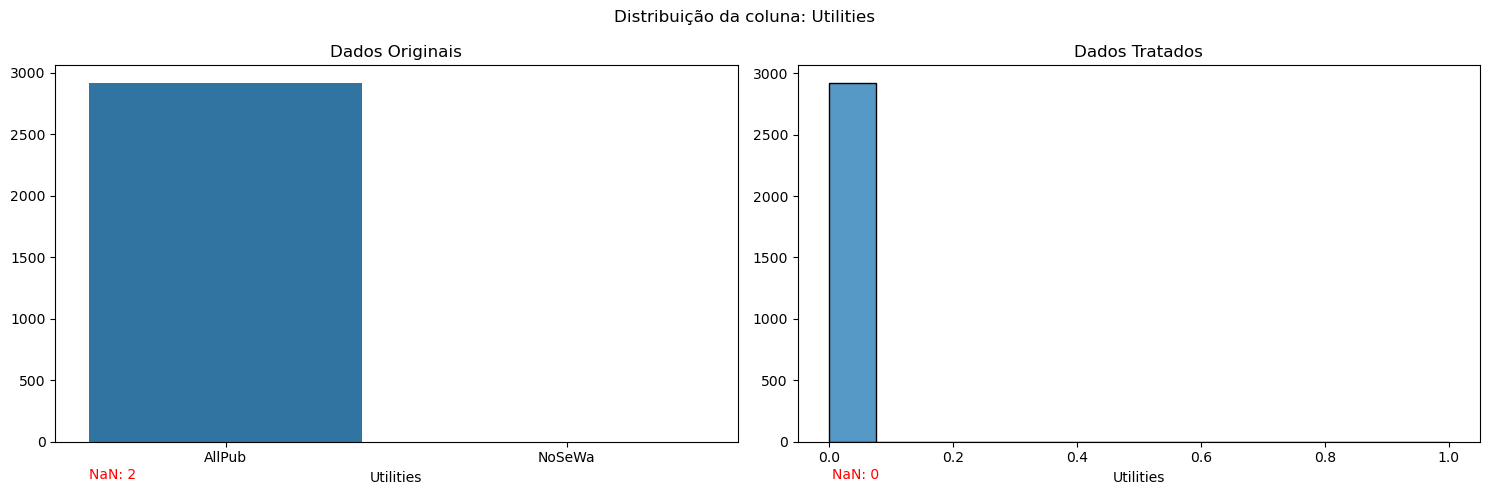

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


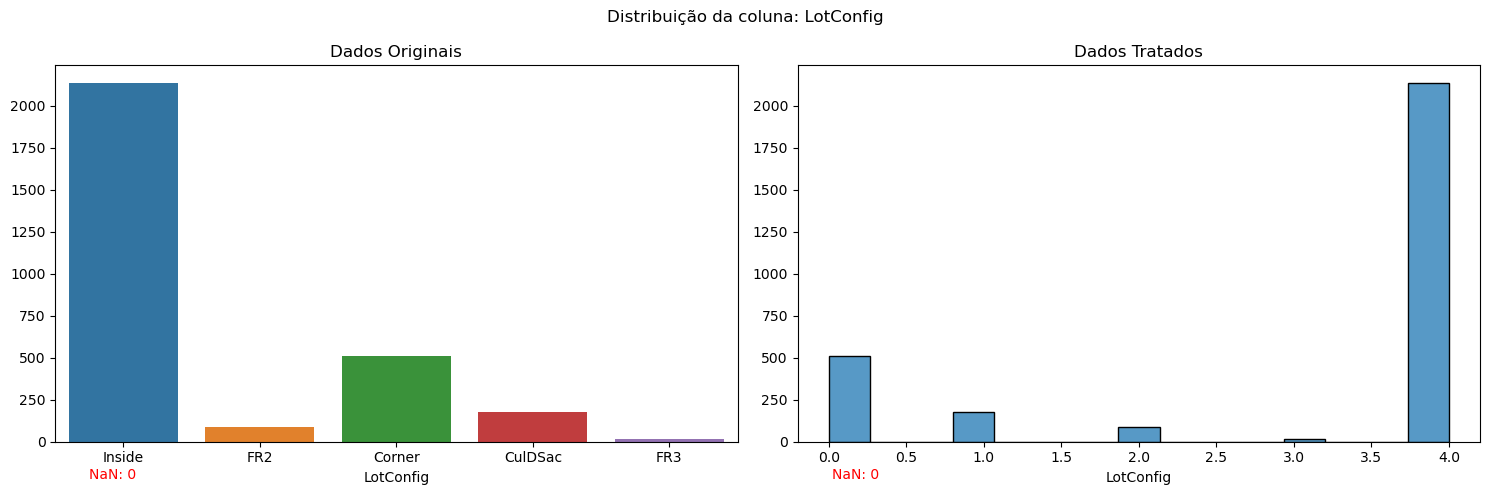

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


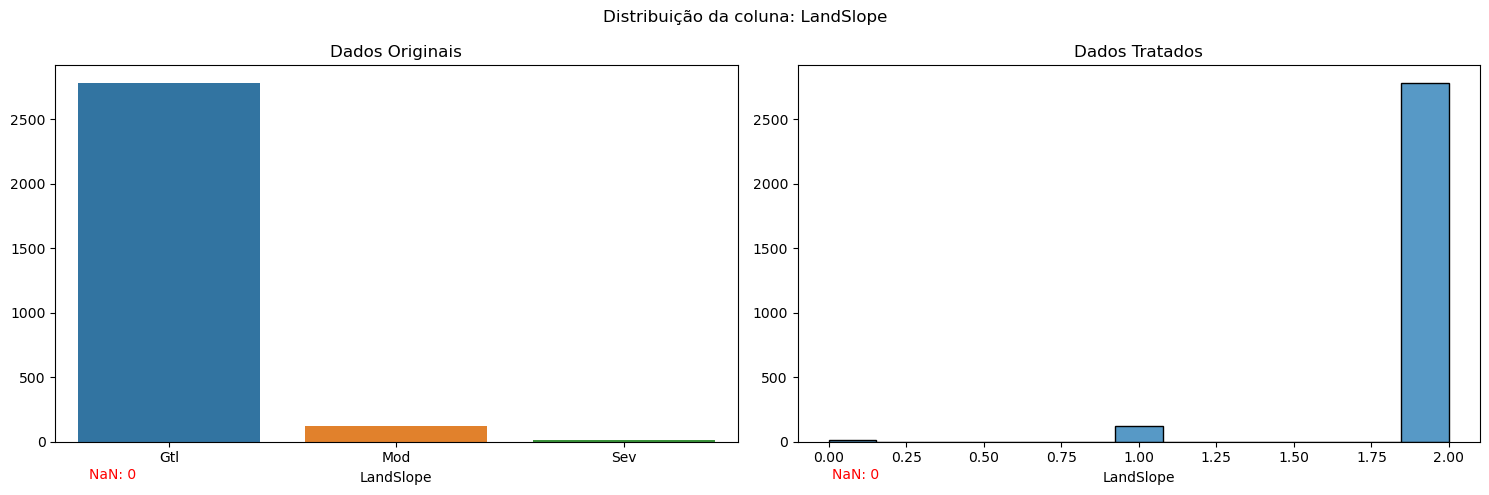

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


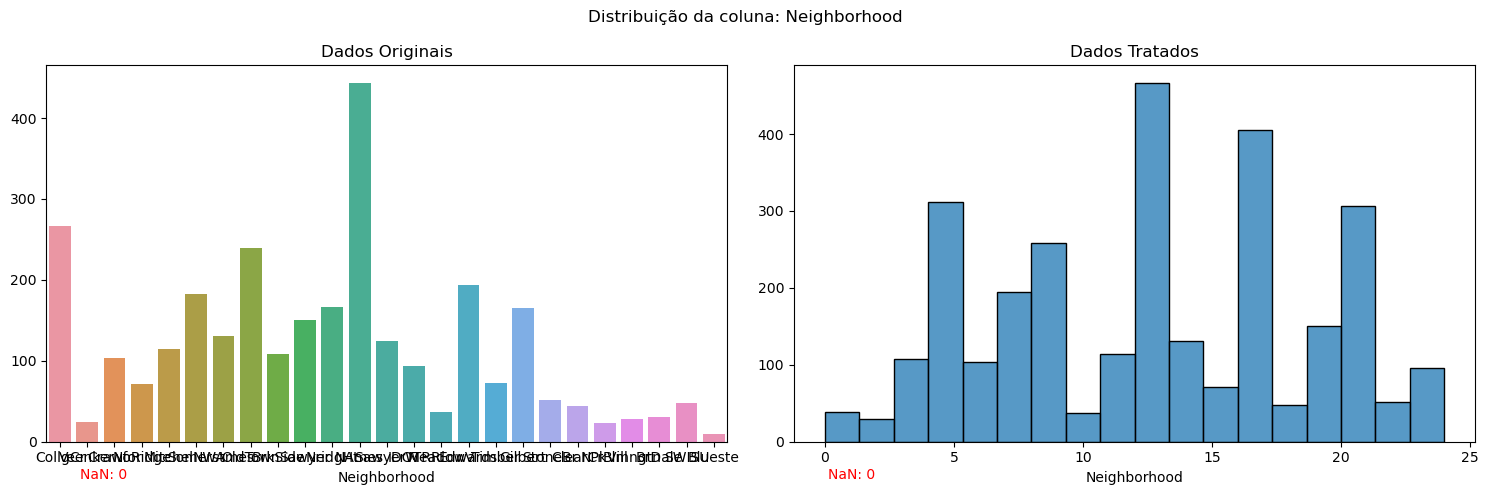

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


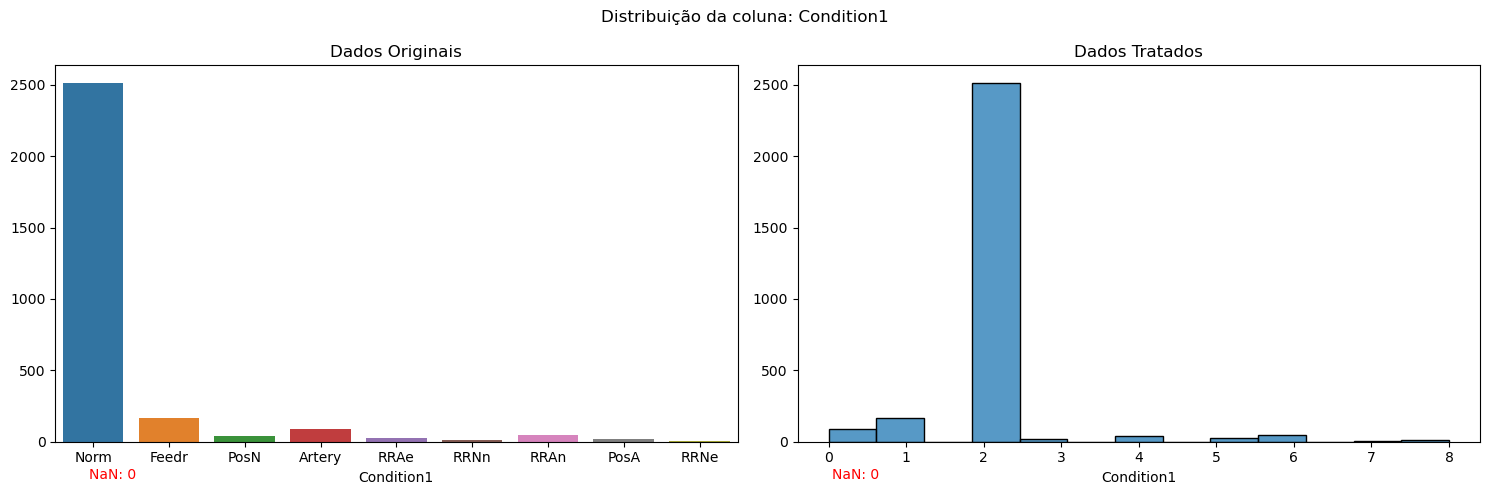

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


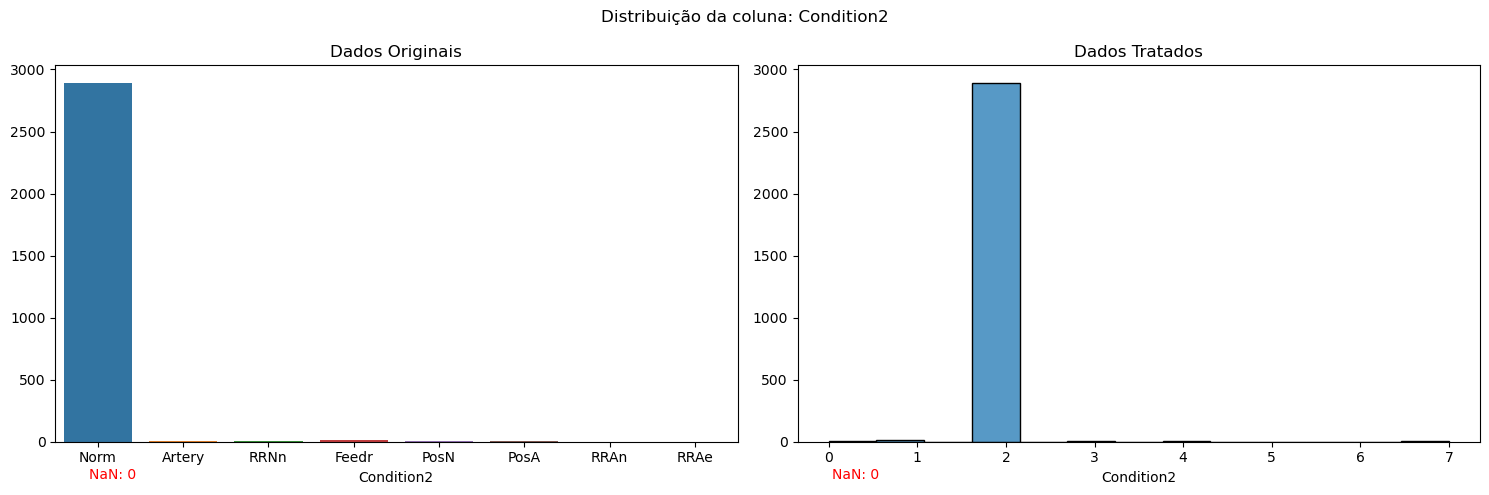

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


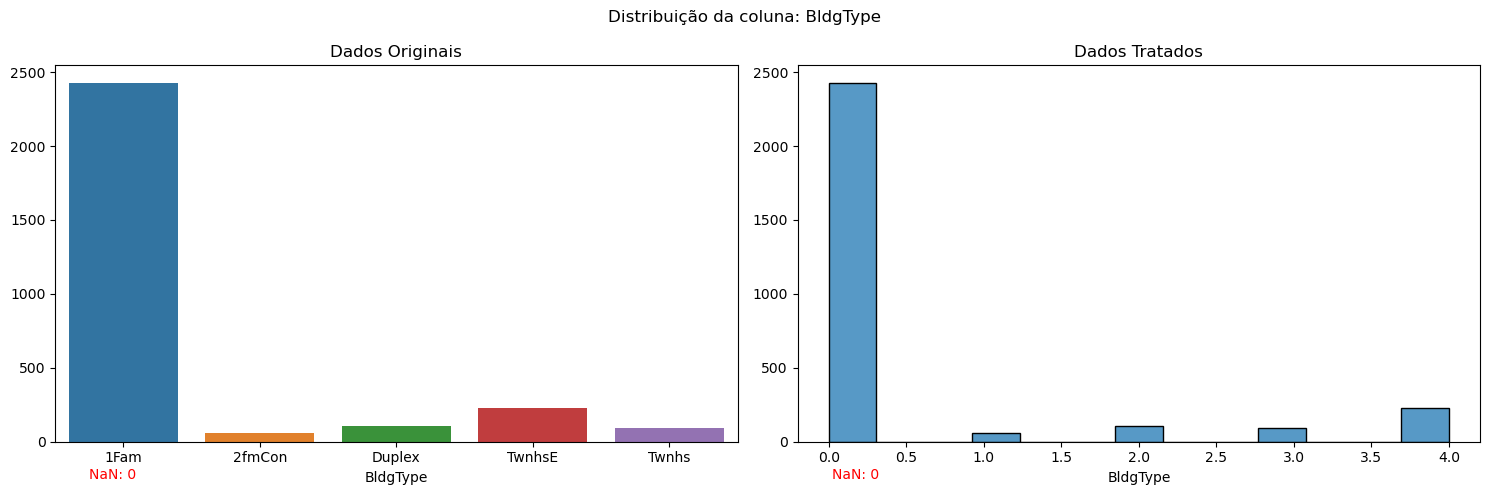

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


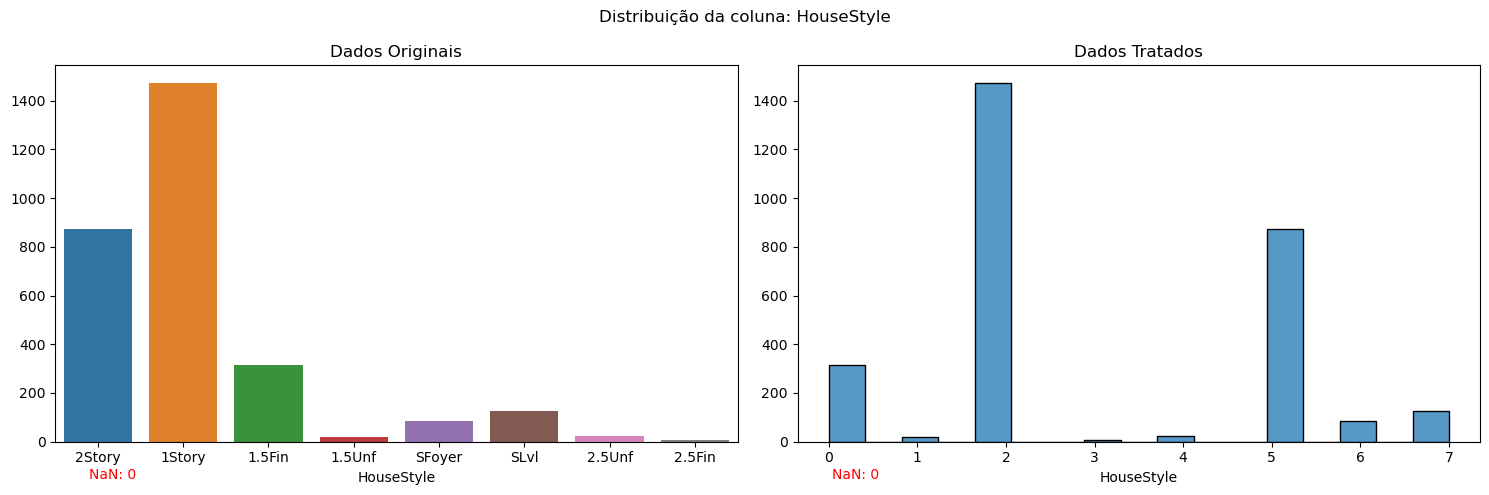

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


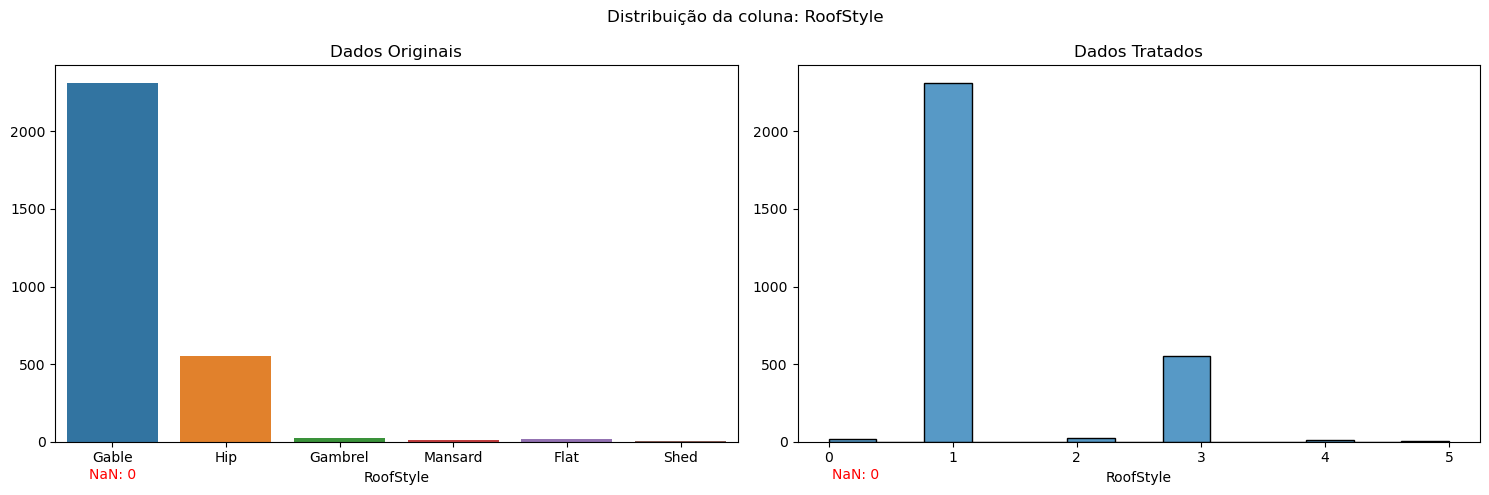

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


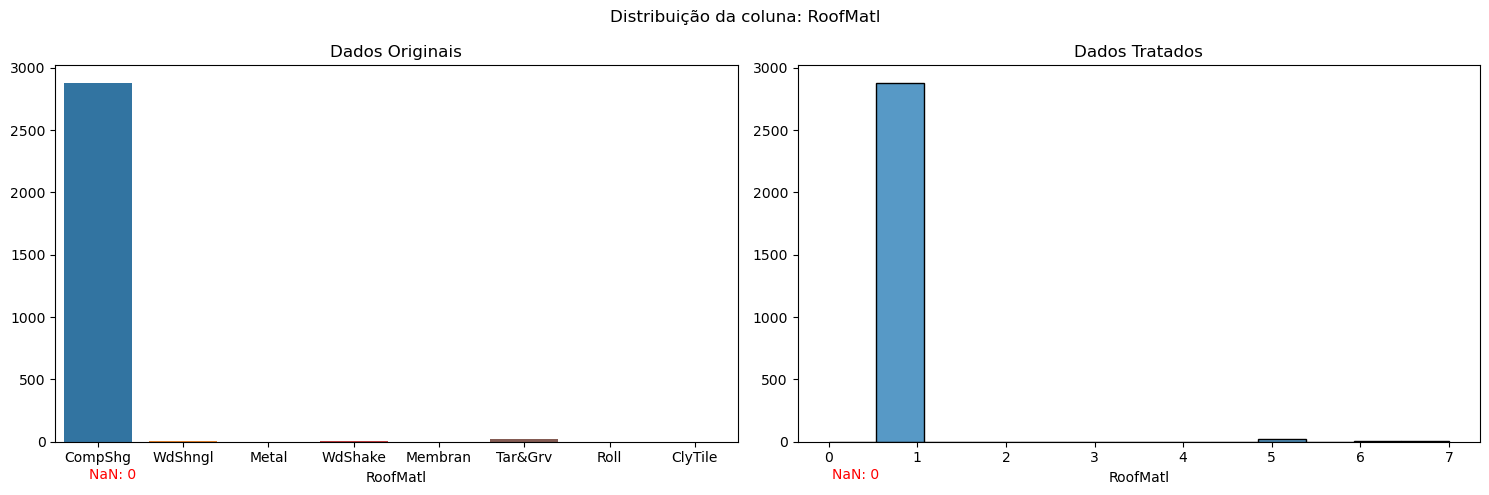

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


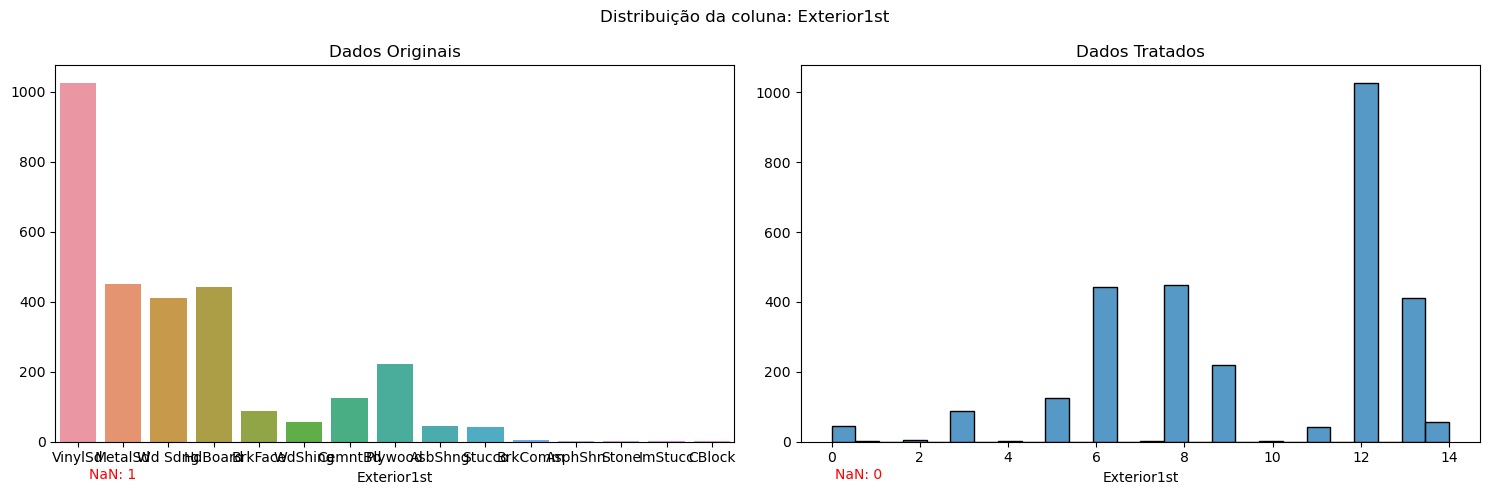

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


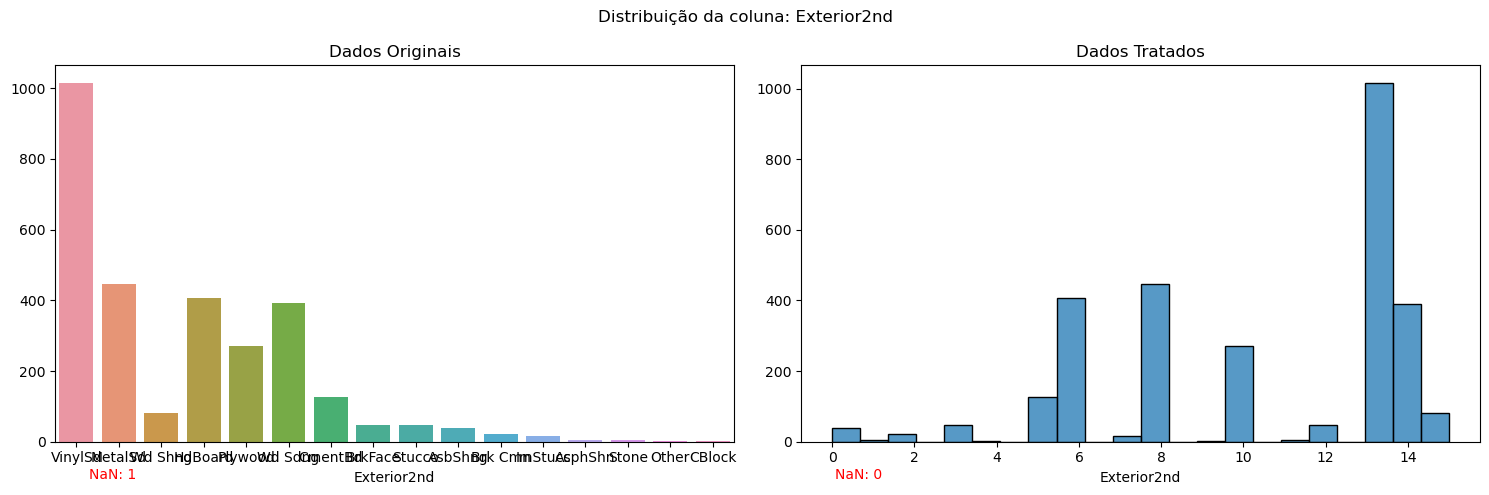

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


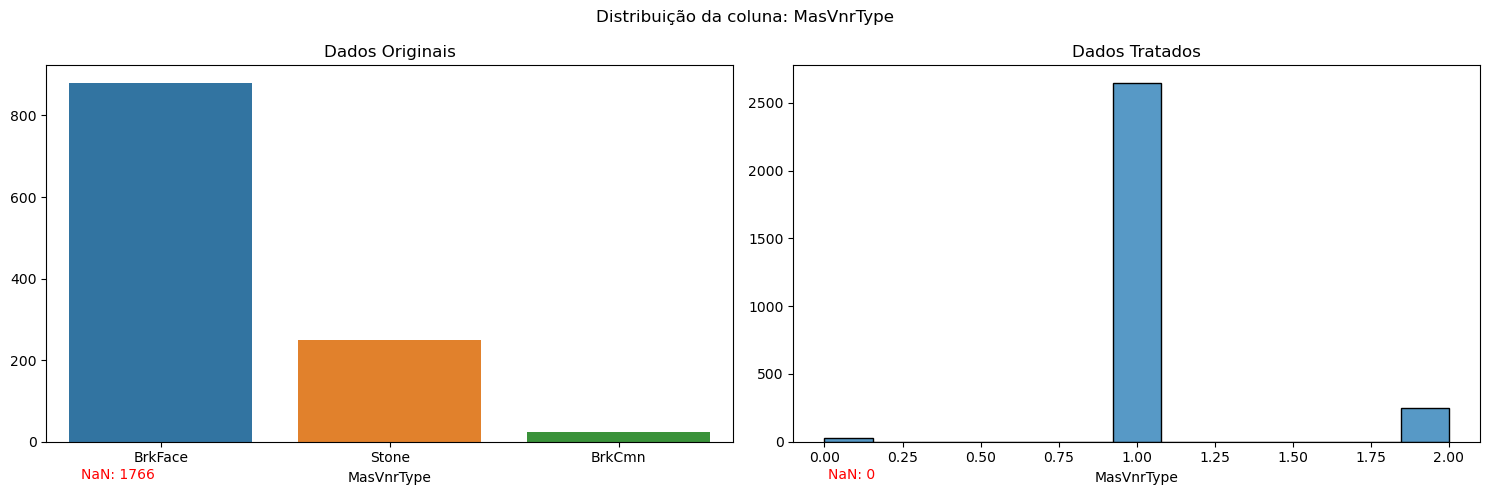

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


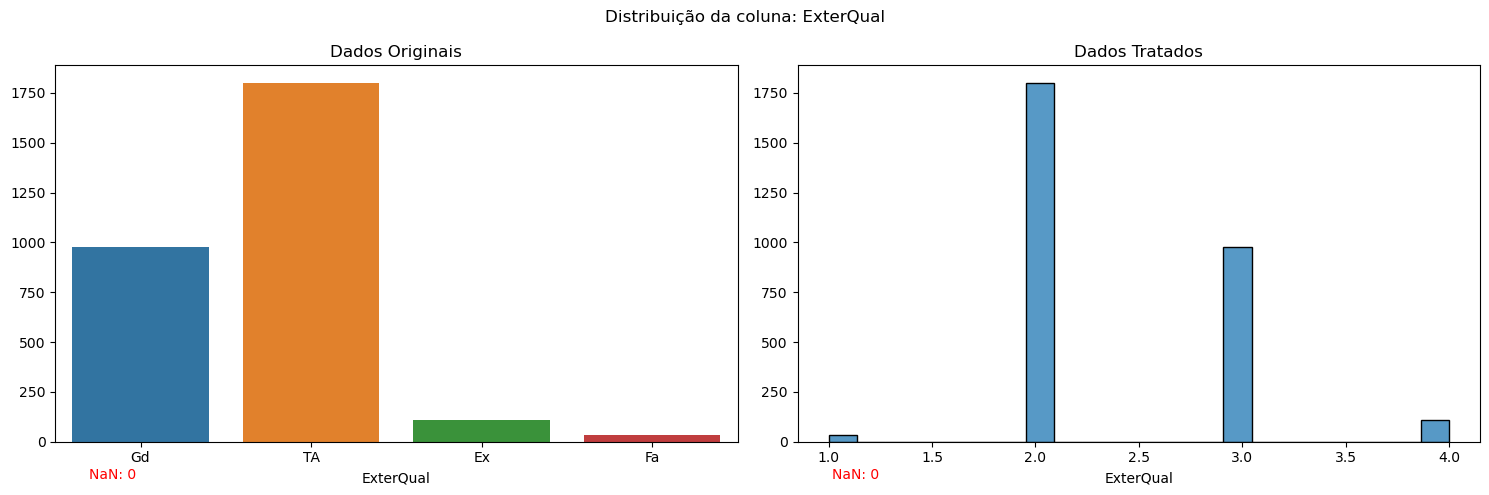

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


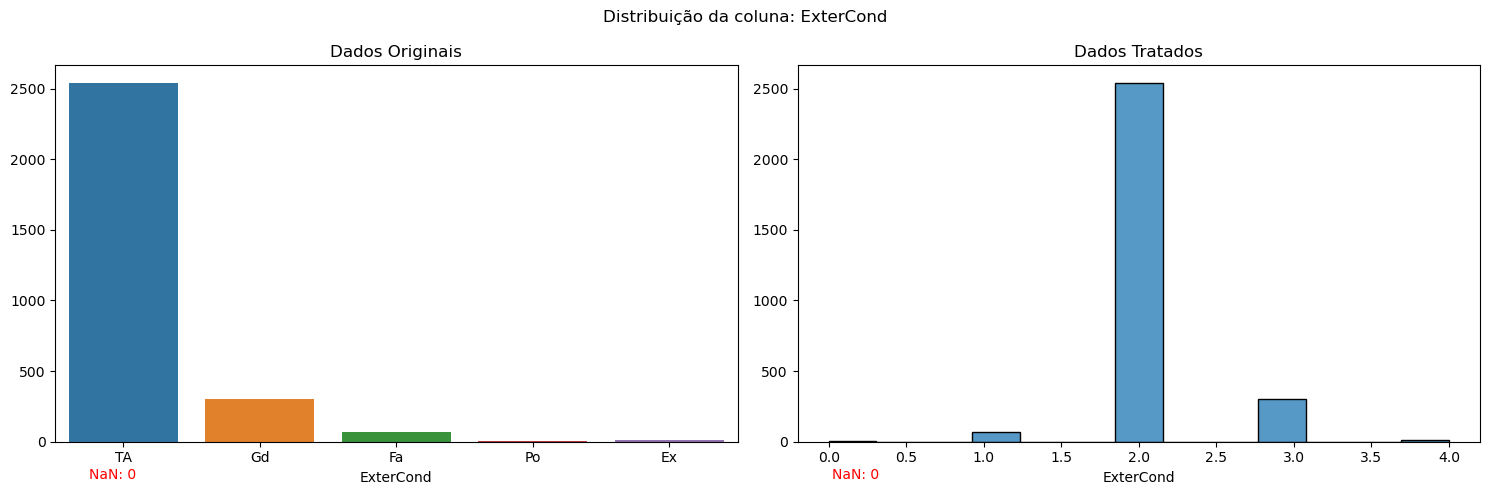

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


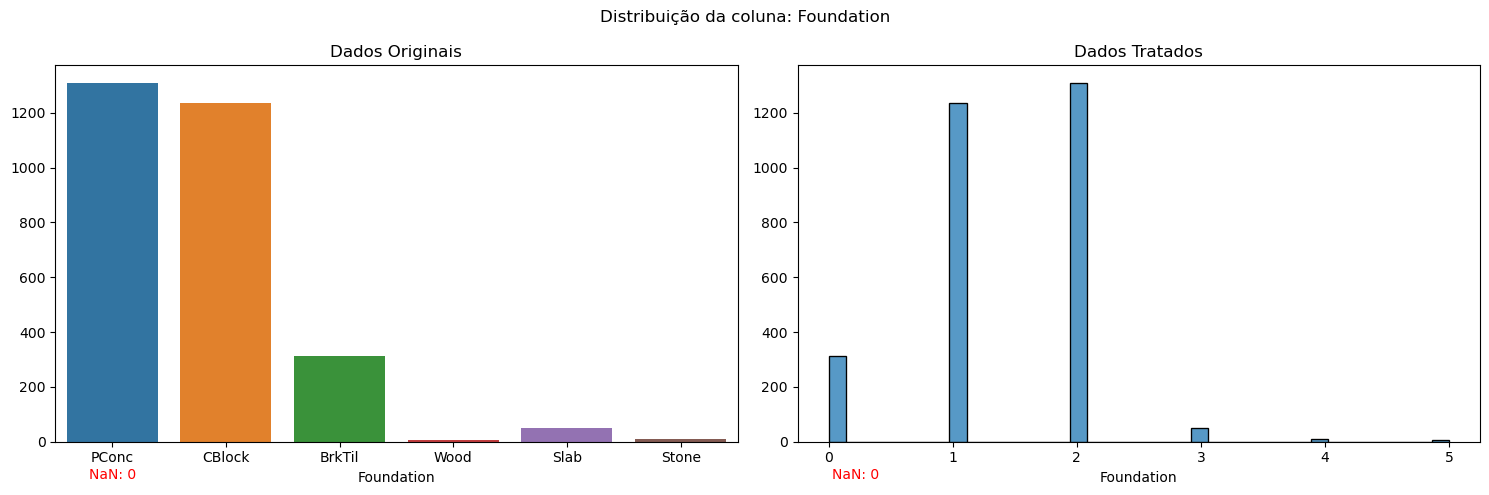

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


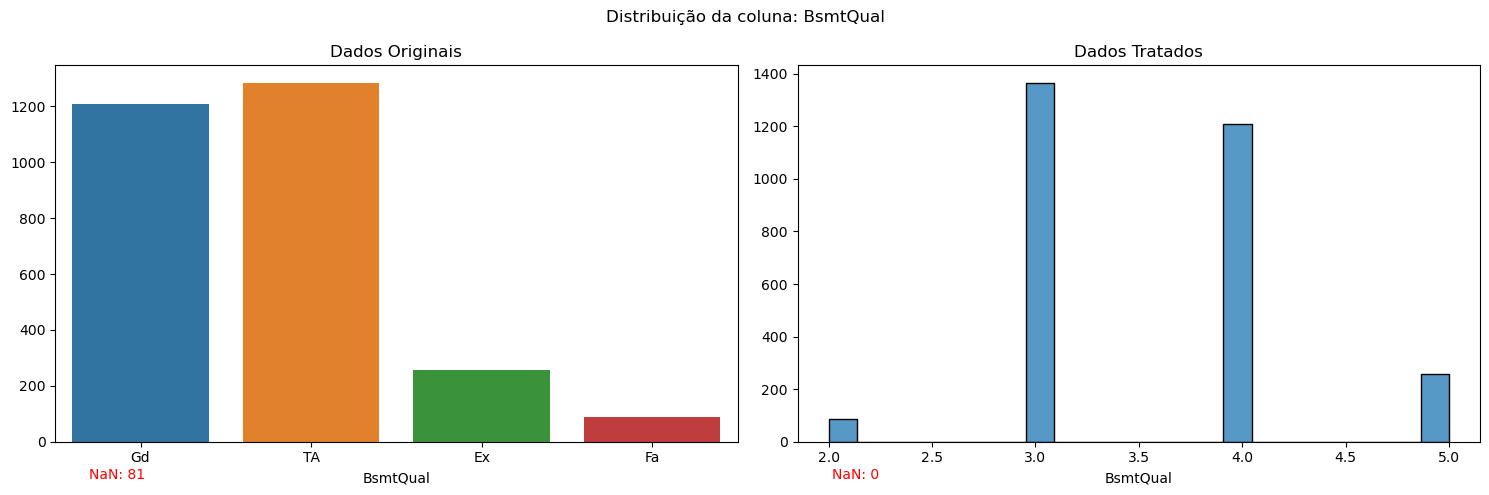

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


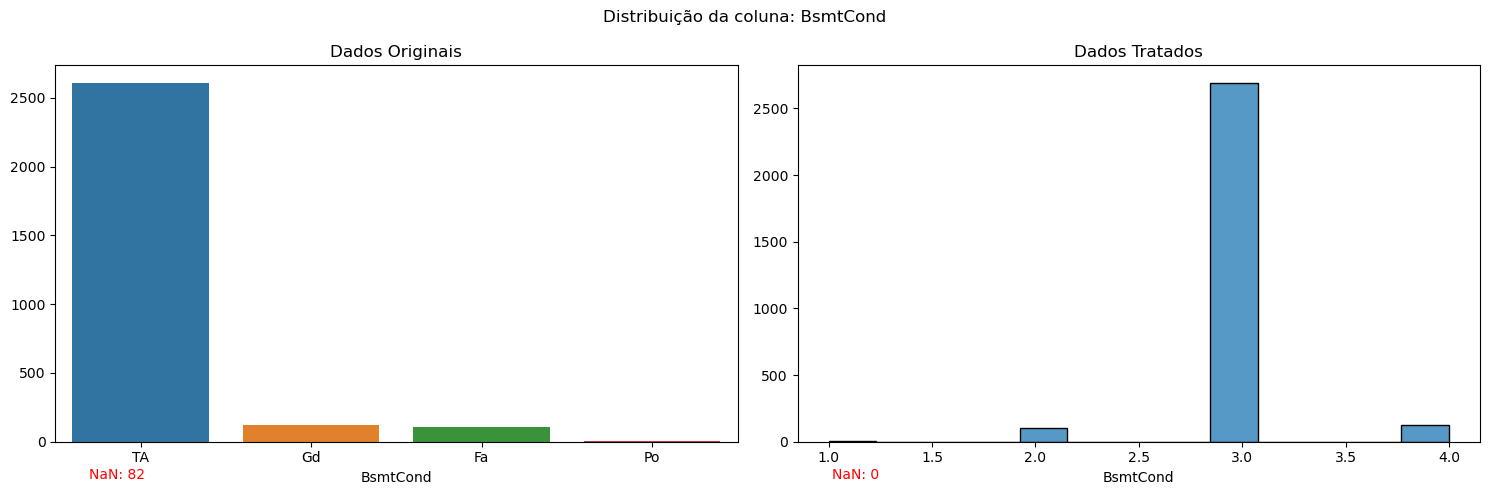

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


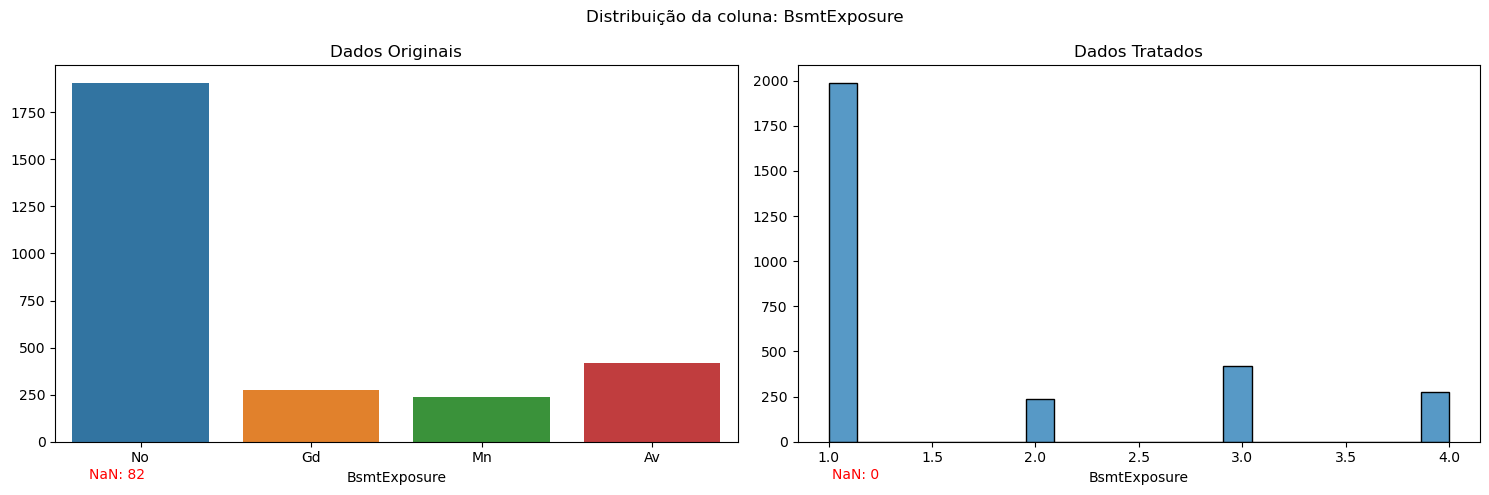

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


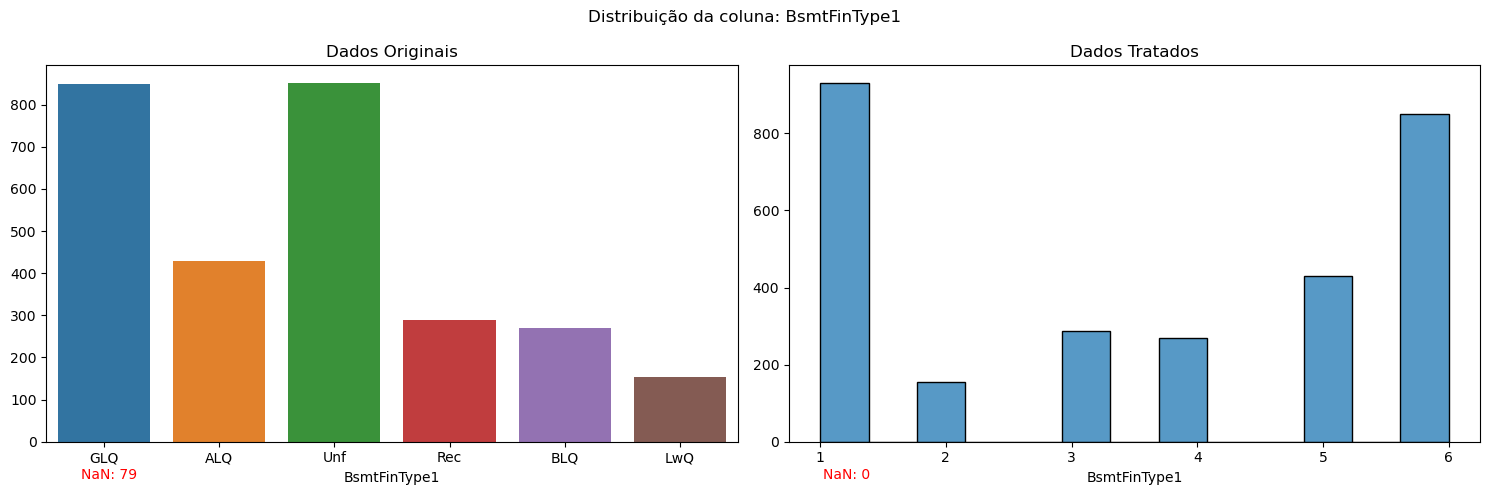

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


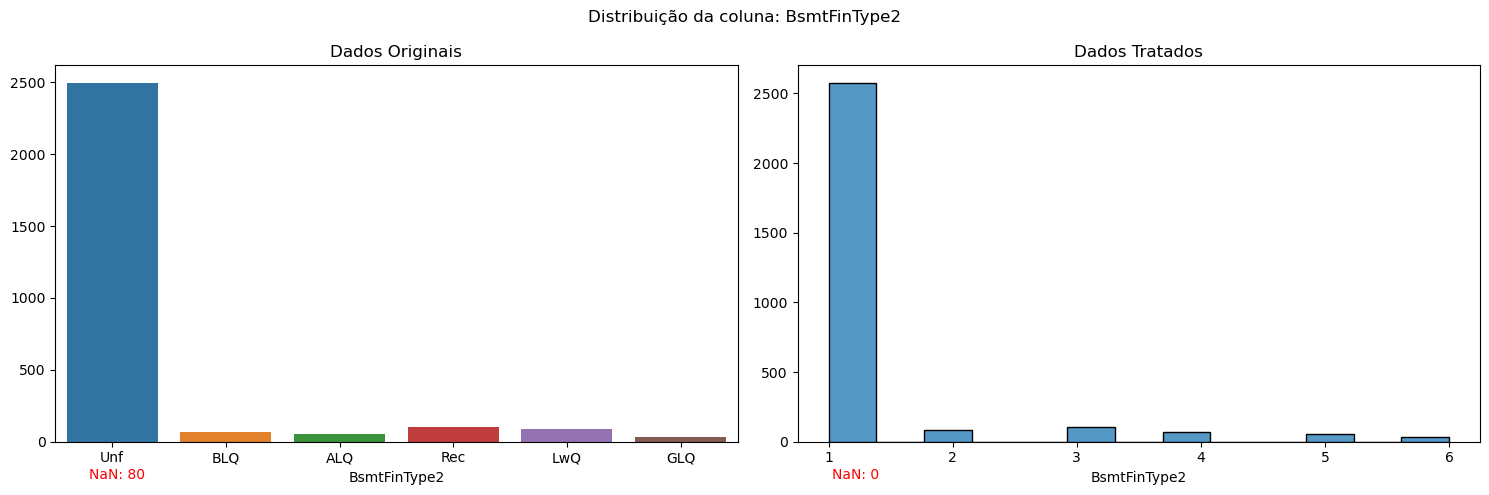

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


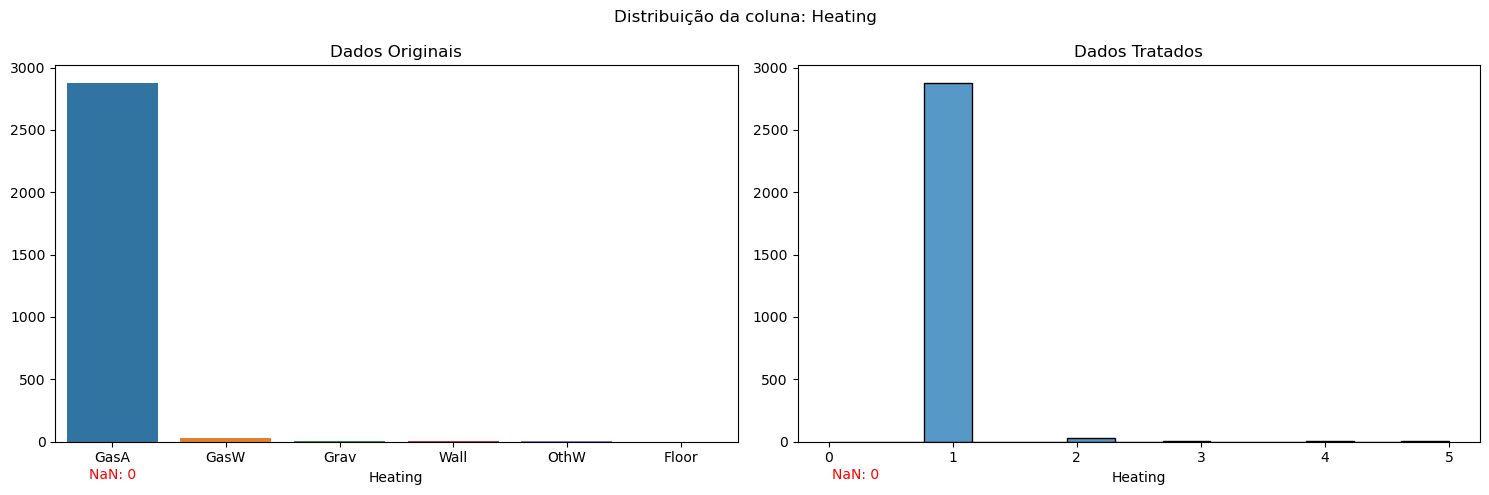

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


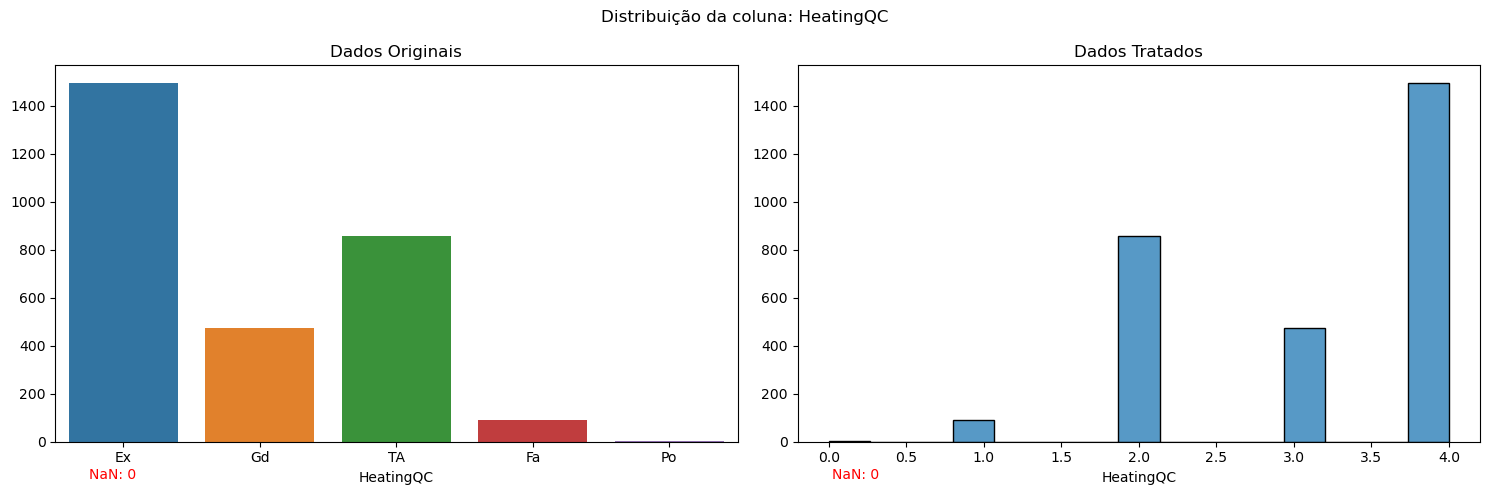

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


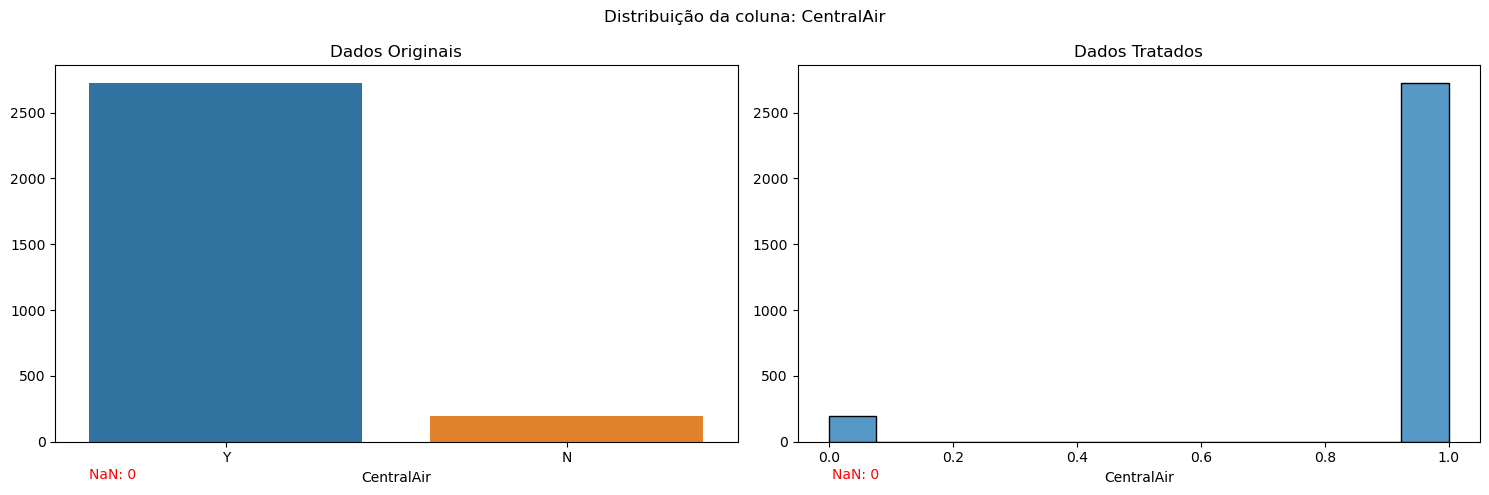

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


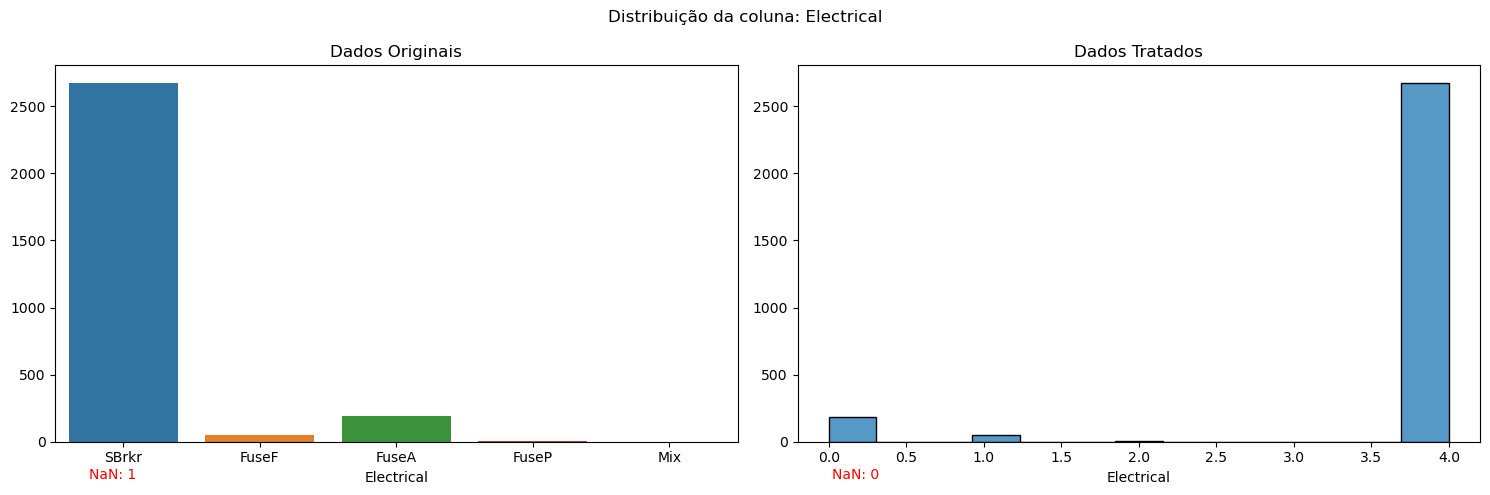

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


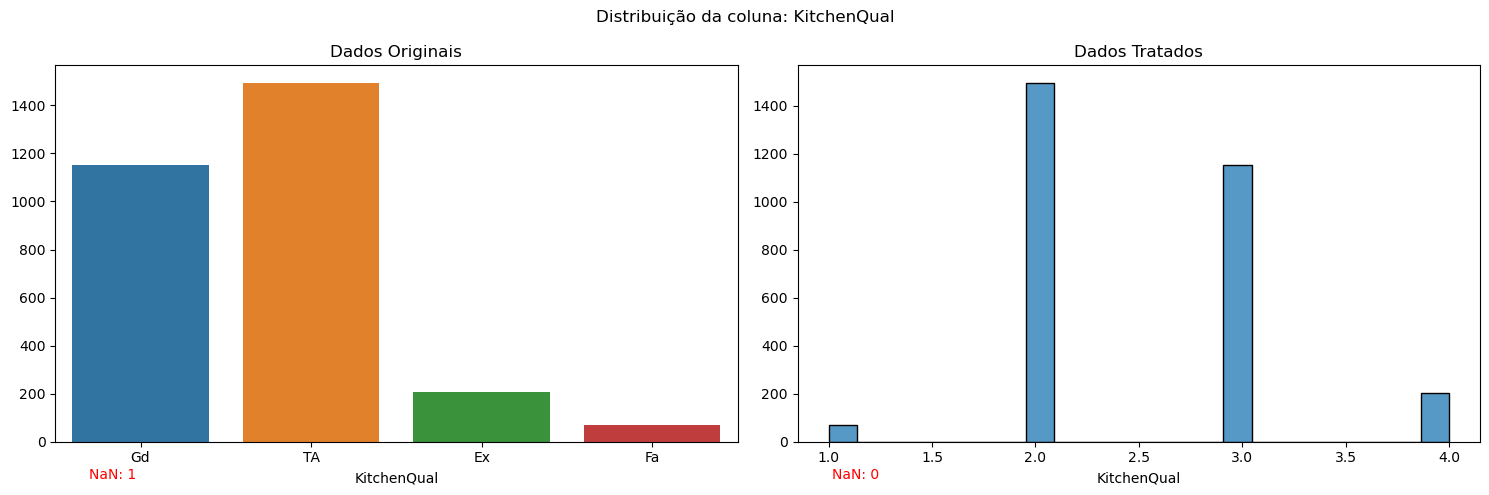

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


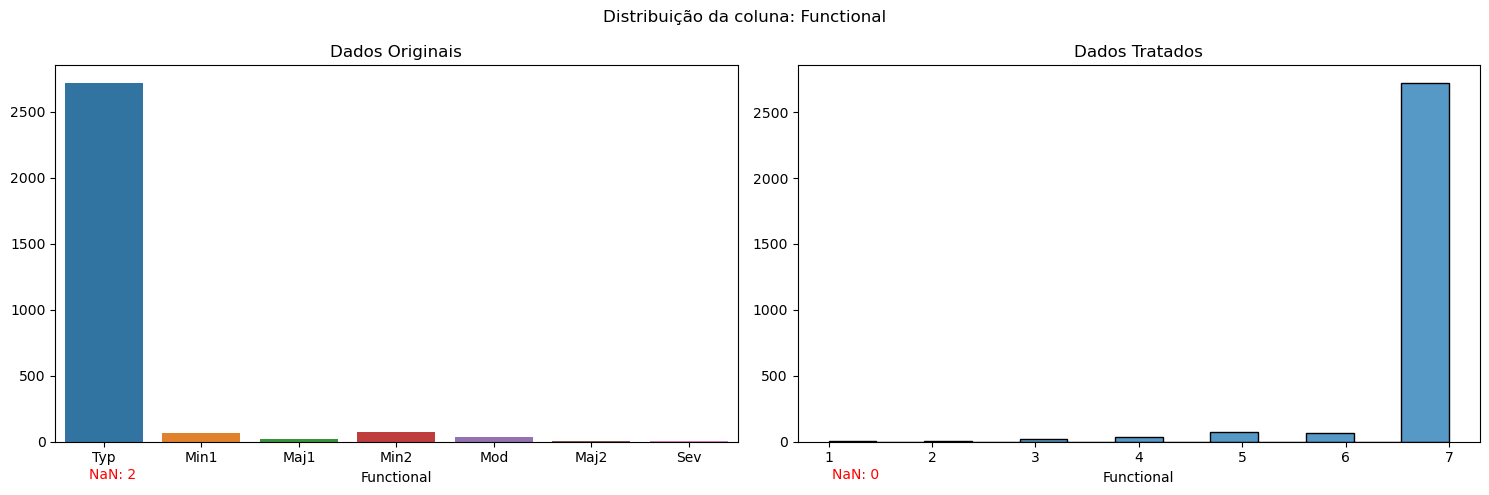

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


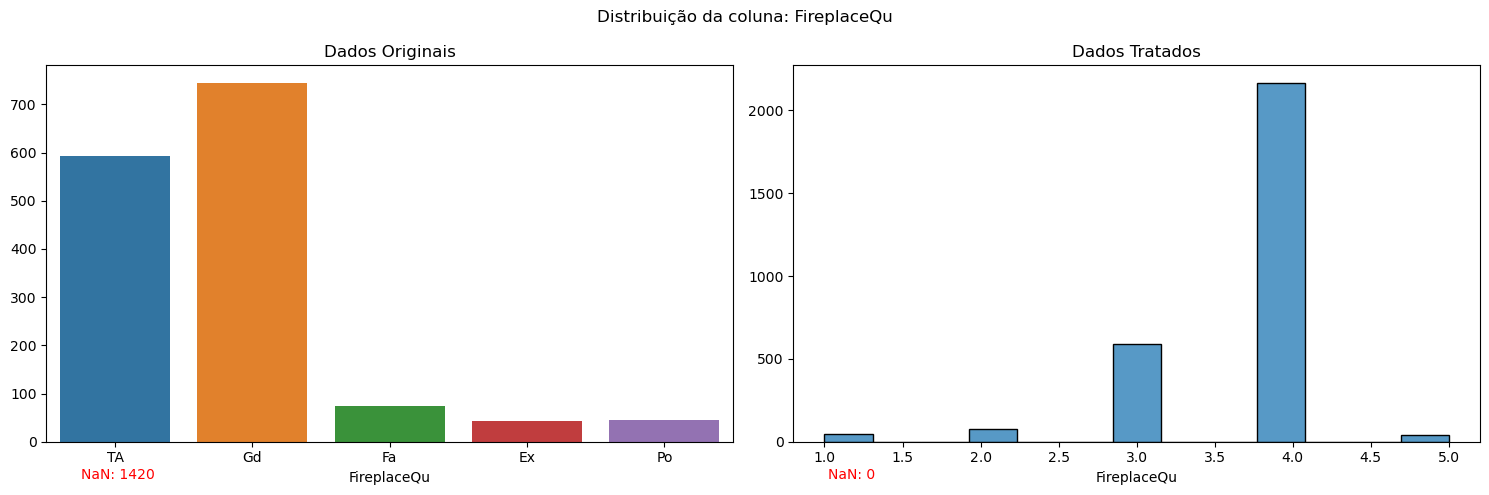

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


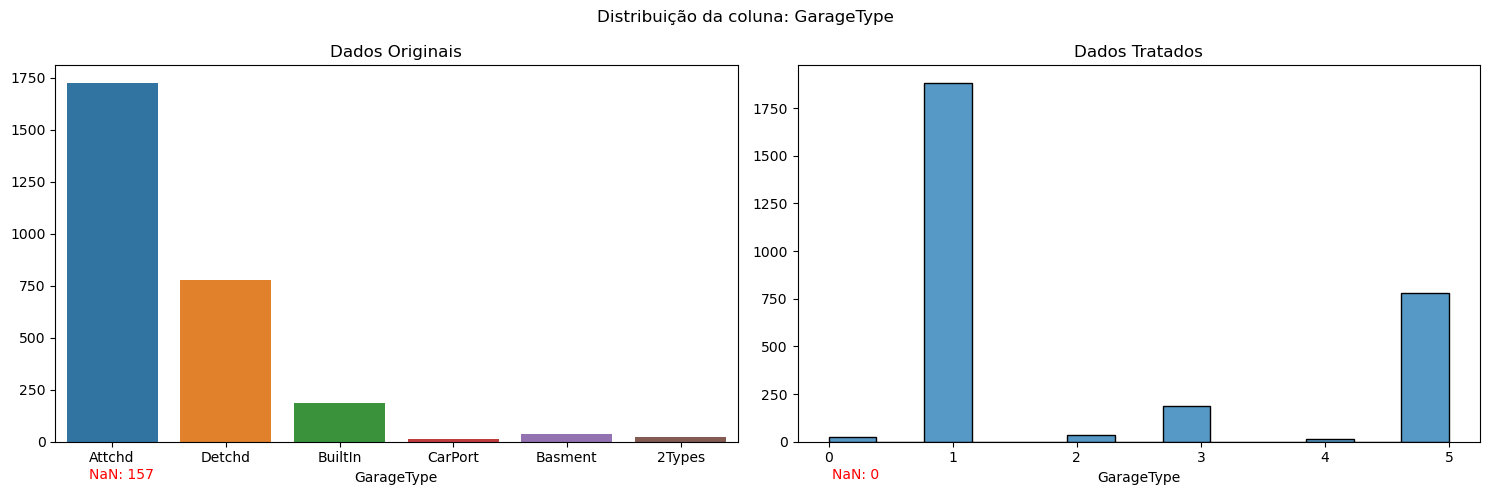

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


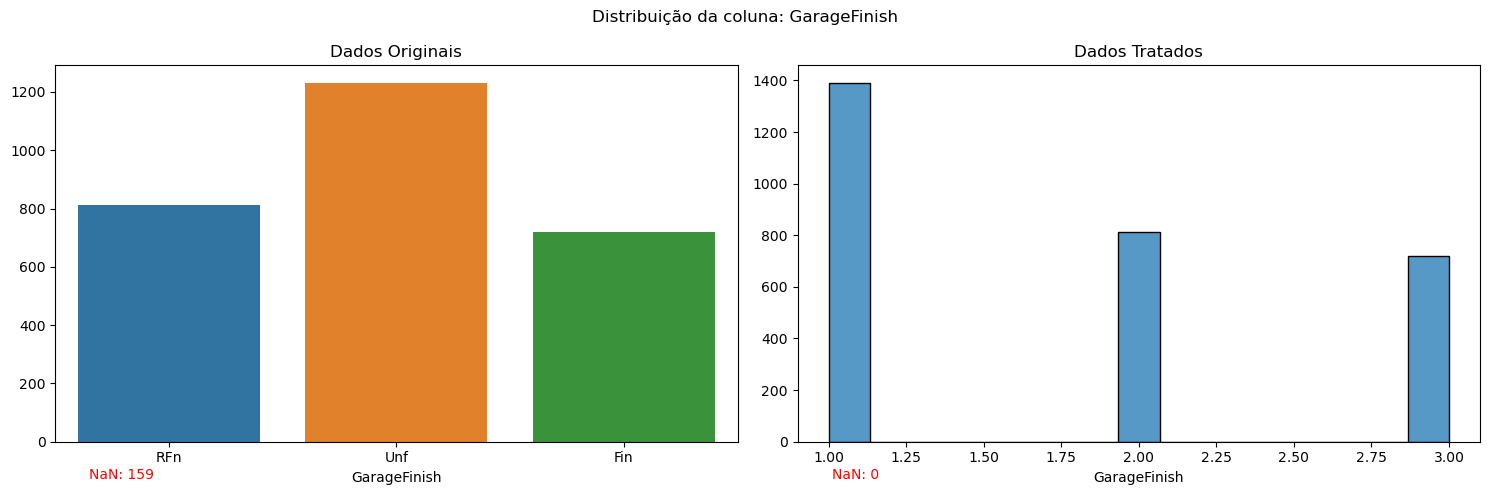

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


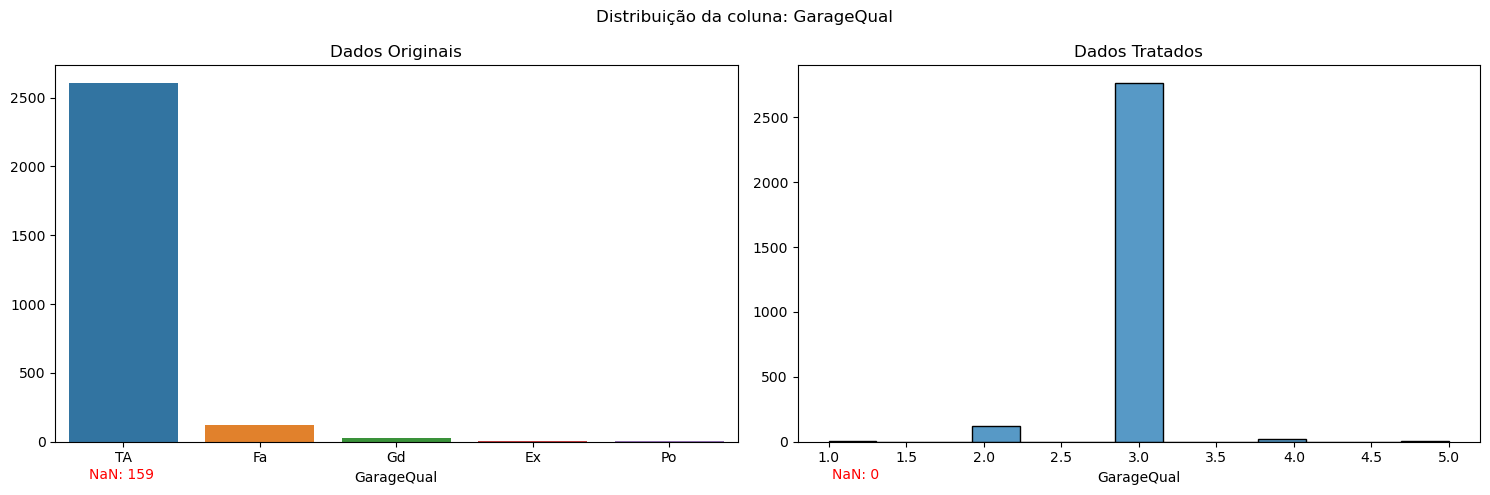

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


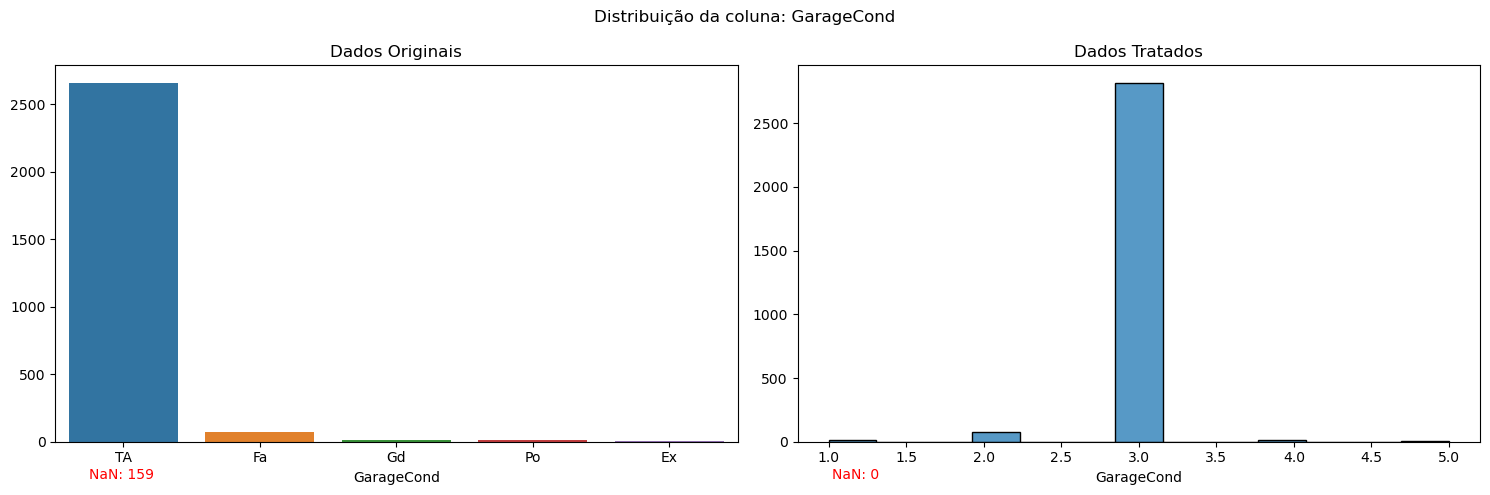

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


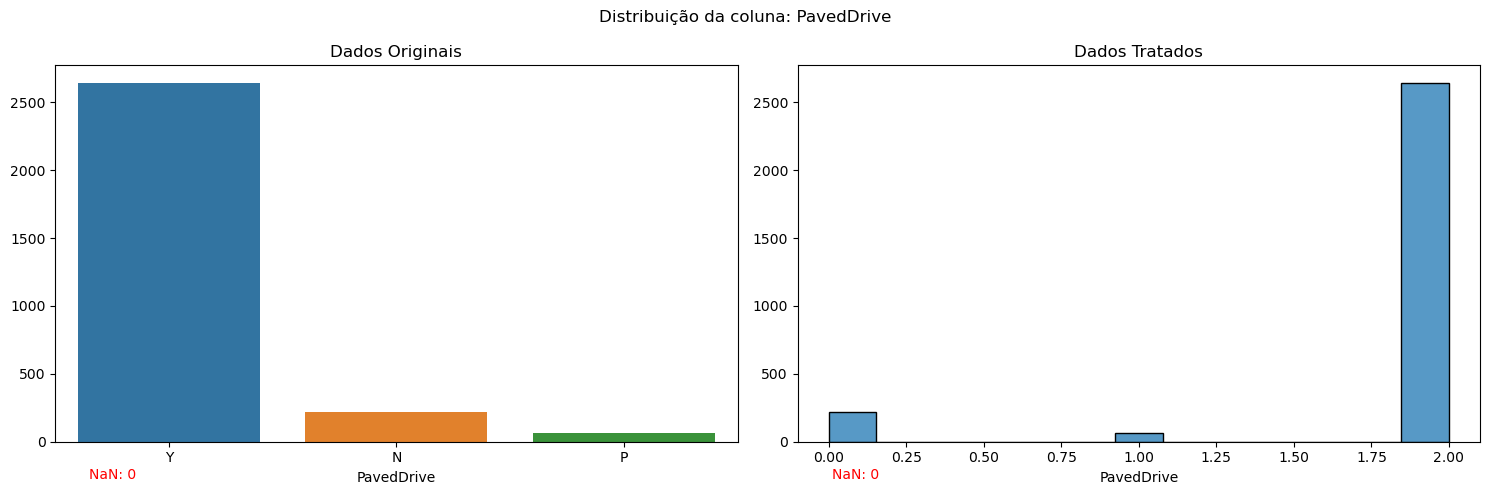

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


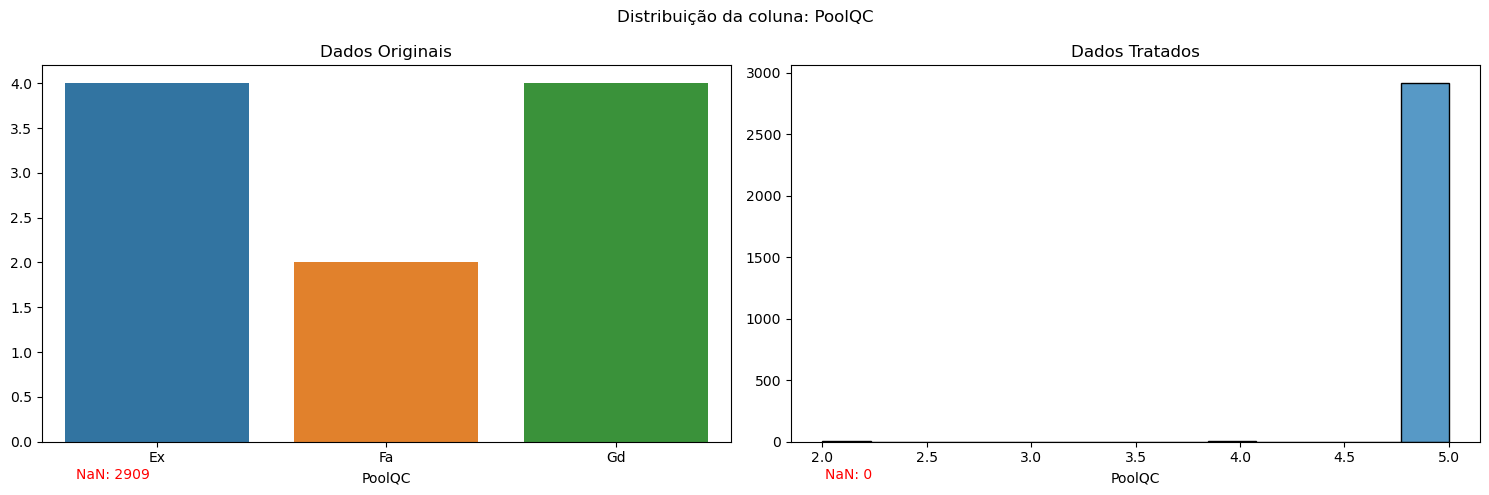

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


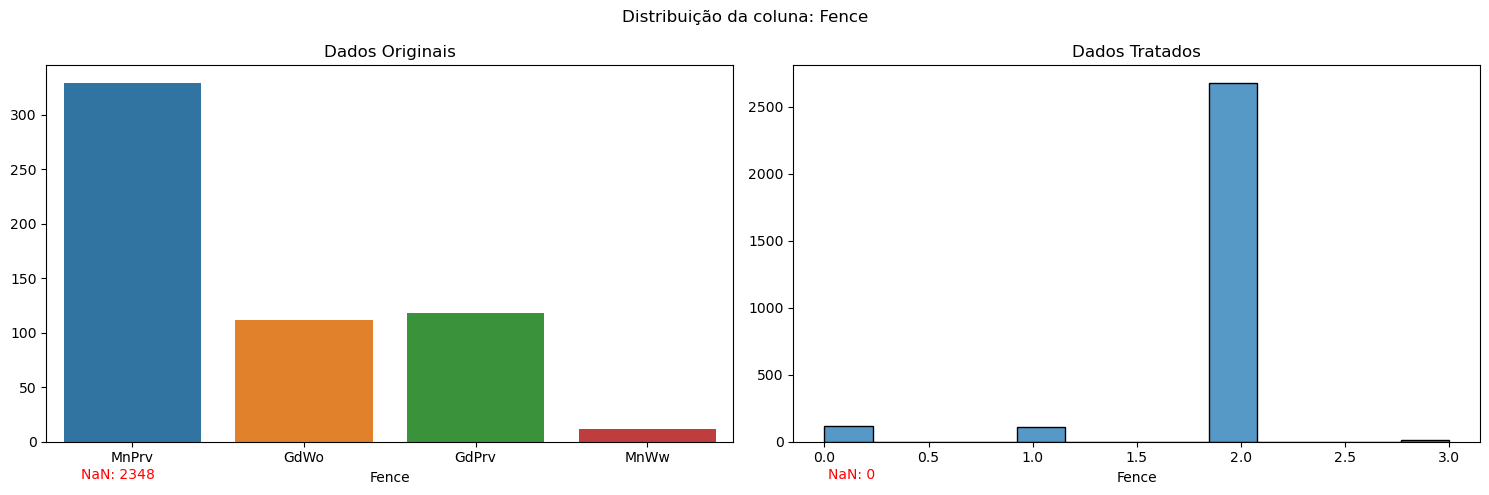

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


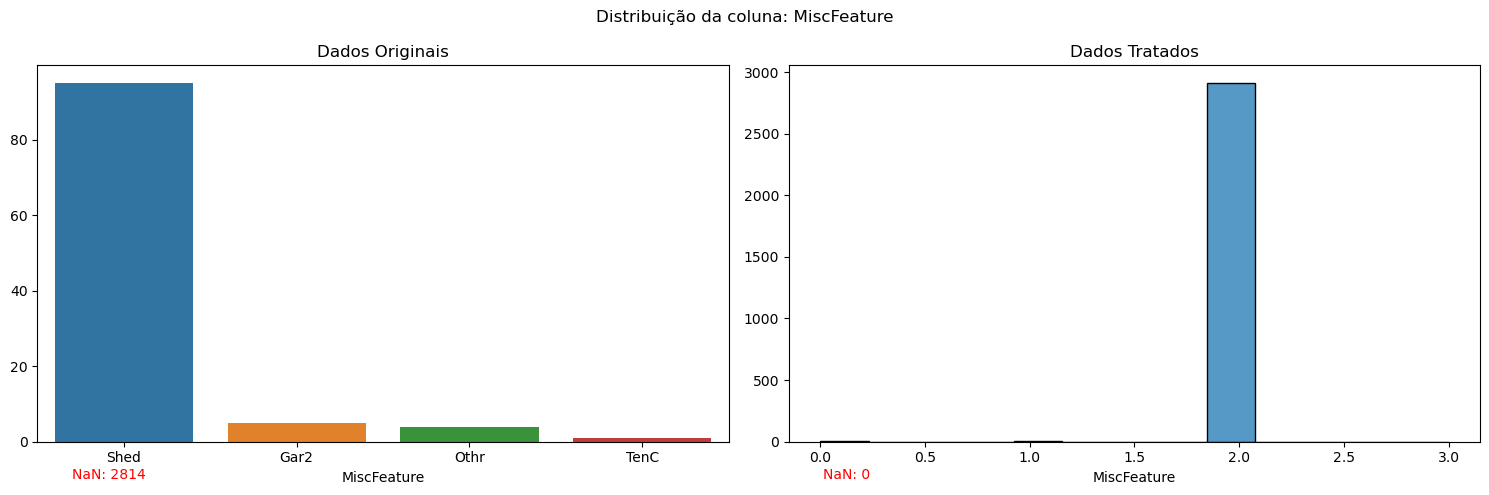

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


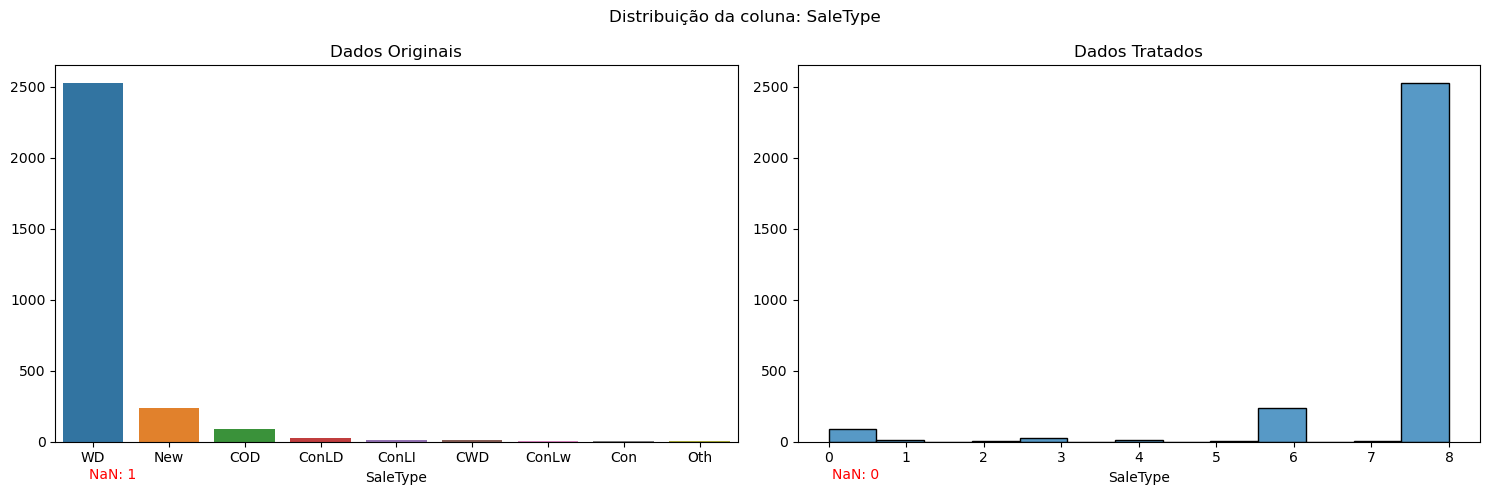

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


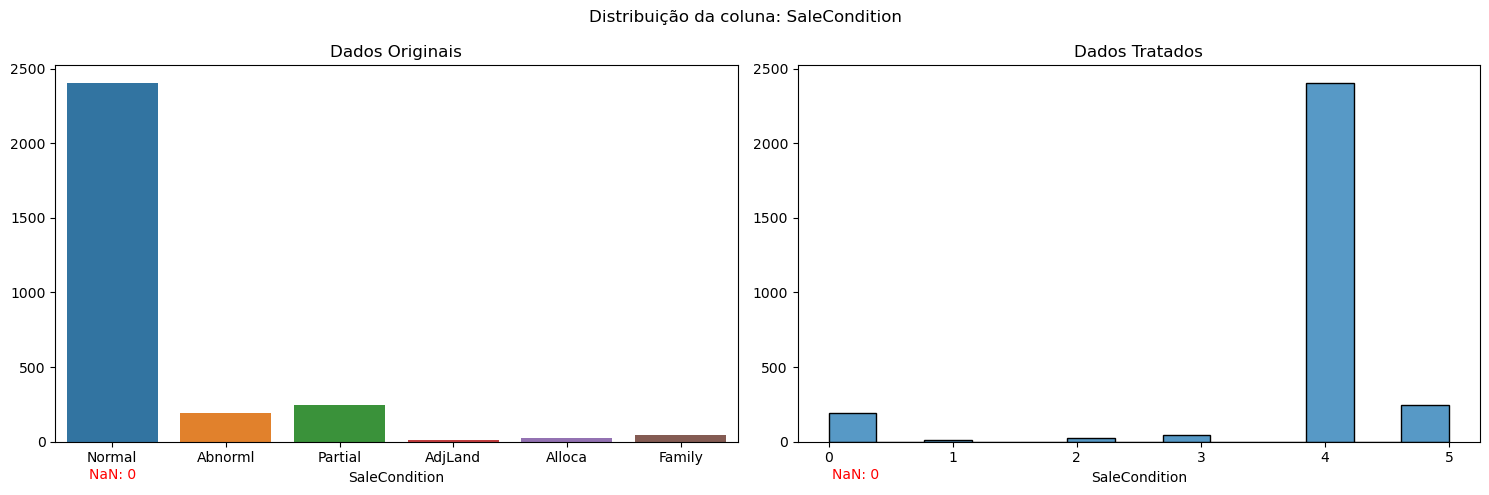

In [29]:
visualizar_tratamentos(df_concat, df_tratados)

In [18]:
df_concat.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [20]:
df_tratados = tratar_lot_frontage(df_concat)

df_tratados = tratar_valores_ausentes_categoricos(df_tratados)
df_tratados = tratar_colunas_categoricas(df_tratados)

In [16]:
df_tratados.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [18]:
df_tratado

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3.0,3,0,...,0,5.0,2,2,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,0,3.0,3,0,...,0,5.0,2,2,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,0,2.0,3,0,...,0,5.0,2,2,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,0,2.0,3,0,...,0,5.0,2,2,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,0,2.0,3,0,...,0,5.0,2,2,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,0,3.0,3,0,...,0,5.0,2,2,0,6,2006,8,4,NaN
1455,2916,160,4,21.0,1894,1,0,3.0,3,0,...,0,5.0,2,2,0,4,2006,8,0,NaN
1456,2917,20,3,160.0,20000,1,0,3.0,3,0,...,0,5.0,2,2,0,9,2006,8,0,NaN
1457,2918,85,3,62.0,10441,1,0,3.0,3,0,...,0,5.0,2,2,700,7,2006,8,4,NaN


In [19]:
print(tratar_valores_ausentes_categoricos(df_concat))

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Grvl      Reg   
1        2          20       RL         80.0     9600   Pave  Grvl      Reg   
2        3          60       RL         68.0    11250   Pave  Grvl      IR1   
3        4          70       RL         60.0     9550   Pave  Grvl      IR1   
4        5          60       RL         84.0    14260   Pave  Grvl      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave  Grvl      Reg   
1455  2916         160       RM         21.0     1894   Pave  Grvl      Reg   
1456  2917          20       RL        160.0    20000   Pave  Grvl      Reg   
1457  2918          85       RL         62.0    10441   Pave  Grvl      Reg   
1458  2919          60       RL         74.0     9627   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [20]:

def tratar_colunas_especiais(df):
    df_tratado = df.copy()
    
    df_tratado['MSSubClass'] = df_tratado['MSSubClass'].astype(int)
    
    
    df_tratado['MoSold_sin'] = np.sin(2 * np.pi * df_tratado['MoSold']/12)
    df_tratado['MoSold_cos'] = np.cos(2 * np.pi * df_tratado['MoSold']/12)
    df_tratado.drop('MoSold', axis=1, inplace=True)
    
    return df_tratado

def tratar_valores_ausentes(df):
    
    df_tratado = df.copy()
    
    
    colunas_numericas = df_tratado.select_dtypes(include=['int64', 'float64']).columns
    for coluna in colunas_numericas:
        df_tratado[coluna] = df_tratado[coluna].fillna(df_tratado[coluna].median())
    
    
    colunas_categoricas = df_tratado.select_dtypes(include=['object']).columns
    for coluna in colunas_categoricas:
        df_tratado[coluna] = df_tratado[coluna].fillna(df_tratado[coluna].mode()[0])
    
    return df_tratado

def codificar_categoricas(df):
    """Aplica codificação apropriada para cada tipo de variável categórica"""
    df_tratado = df.copy()
    
    # Colunas para ignorar (não precisam de codificação)
    colunas_ignorar = ['Id', 'SalePrice']
    
    # Identificar colunas categóricas
    colunas_categoricas = df_tratado.select_dtypes(include=['object']).columns
    colunas_categoricas = [col for col in colunas_categoricas if col not in colunas_ignorar]
    
    # Aplicar Label Encoding para todas as colunas categóricas
    le = LabelEncoder()
    for coluna in colunas_categoricas:
        df_tratado[coluna] = le.fit_transform(df_tratado[coluna].astype(str))
    
    return df_tratado

def pipeline_tratamento(df):
    """Pipeline completo de tratamento dos dados"""
    # 1. Tratar colunas especiais
    df_tratado = tratar_colunas_especiais(df)
    
    # 2. Tratar valores ausentes
    df_tratado = tratar_valores_ausentes(df_tratado)
    
    # 3. Codificar variáveis categóricas
    df_tratado = codificar_categoricas(df_tratado)
    
    # 4. Verificar se ainda existem colunas do tipo 'object'
    colunas_object = df_tratado.select_dtypes(include=['object']).columns
    if len(colunas_object) > 0:
        print(f"Atenção: Ainda existem colunas do tipo object: {list(colunas_object)}")
    
    return df_tratado

def verificar_tratamento(df_original, df_tratado):
    """Função para verificar o resultado do tratamento"""
    print("\nResumo do tratamento:")
    print("-" * 50)
    print("\nTipos de dados originais:")
    print(df_original.dtypes.value_counts())
    print("\nTipos de dados após tratamento:")
    print(df_tratado.dtypes.value_counts())
    print("\nColunas com valores nulos (original):")
    print(df_original.isnull().sum()[df_original.isnull().sum() > 0])
    print("\nColunas com valores nulos (tratado):")
    print(df_tratado.isnull().sum()[df_tratado.isnull().sum() > 0])

In [21]:
df_concat.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
df_tratado = pipeline_tratamento(df_concat)
df_tratado

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,MoSold_sin,MoSold_cos
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,0,2008,8,4,208500.0,8.660254e-01,5.000000e-01
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,0,2007,8,4,181500.0,5.000000e-01,-8.660254e-01
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,0,2008,8,4,223500.0,-1.000000e+00,-1.836970e-16
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,0,2006,8,0,140000.0,8.660254e-01,5.000000e-01
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,0,2008,8,4,250000.0,-2.449294e-16,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,0,3,3,0,...,0,2,2,0,2006,8,4,163000.0,1.224647e-16,-1.000000e+00
1455,2916,160,4,21.0,1894,1,0,3,3,0,...,0,2,2,0,2006,8,0,163000.0,8.660254e-01,-5.000000e-01
1456,2917,20,3,160.0,20000,1,0,3,3,0,...,0,2,2,0,2006,8,0,163000.0,-1.000000e+00,-1.836970e-16
1457,2918,85,3,62.0,10441,1,0,3,3,0,...,0,2,2,700,2006,8,4,163000.0,-5.000000e-01,-8.660254e-01


In [23]:
verificar_tratamento(df_concat, df_tratado)


Resumo do tratamento:
--------------------------------------------------

Tipos de dados originais:
object     43
int64      26
float64    12
Name: count, dtype: int64

Tipos de dados após tratamento:
int32      44
int64      24
float64    14
Name: count, dtype: int64

Colunas com valores nulos (original):
LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

Colunas com valores nulos (tratado):
Series([], dtype: int64)


# **Aplicação de Machine Learning**
### *Separando a features e target*

In [24]:
X = df_tratado.drop(['SalePrice', 'Id'], axis=1)
y = df_tratado['SalePrice']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# from sklearn.linear_model  import LinearRegression, Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import lightgbm as lgb
# import xgboost

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machines": SVR(),
    "Decision Trees": DecisionTreeRegressor(),
    "Neural Networks": MLPRegressor(),
    "xgboost": xgboost.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results[name] = {
         "MSE": mse,
         "R2" : r2,
         "MAE": mae,
         "RMSE": rmse
    }

    print(f'\nResultado para {name}:')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2:.2f}')


Resultado para Linear Regression:
RMSE: 13168781288792.69
R2: -47082942045638456.00

Resultado para Ridge Regression:
RMSE: 46003.37
R2: 0.43

Resultado para Lasso Regression:
RMSE: 46004.10
R2: 0.43


c:\Users\jherfson\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.911e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(



Resultado para Random Forest:
RMSE: 44448.84
R2: 0.46

Resultado para Gradient Boosting:
RMSE: 43742.81
R2: 0.48


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score:", np.sqrt(-grid_search.best_score_))

Melhores parâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Melhor score: 42872.34676265832


In [ ]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Trees": DecisionTreeRegressor(),
    "Neural Networks": MLPRegressor(),
    "xgboost": xgboost.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    print(f"Melhores parâmetros {name}: {grid_search.best_params_}")
    print(f"Melhor score {name}: {np.sqrt(-grid_search.best_score_)}")


Melhores parâmetros Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Melhor score Random Forest: 42872.34676265832
Melhores parâmetros Gradient Boosting: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Melhor score Gradient Boosting: 46802.9650710589


ValueError: Invalid parameter 'n_estimators' for estimator DecisionTreeRegressor(max_depth=10). Valid parameters are: ['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'].

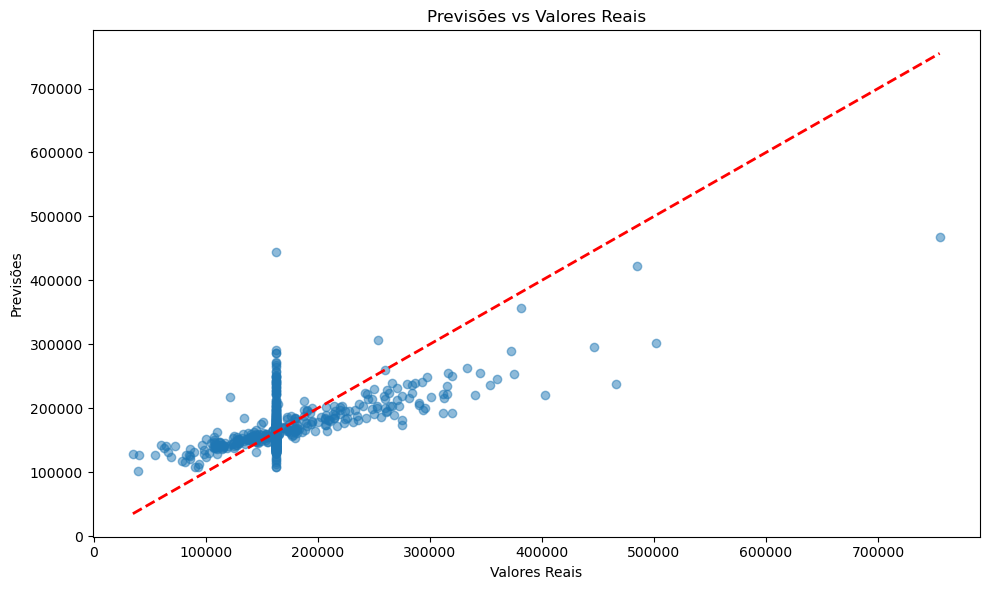

In [ ]:
# Plotar previsões vs valores reais
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Usar com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
plot_predictions(y_test, y_pred, 'Previsões vs Valores Reais')

In [ ]:
def plot_feature_importance(model, X):
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importances.head(20), x='importance', y='feature')
    plt.title('Top 20 Features Mais Importantes')
    plt.tight_layout()
    plt.show()

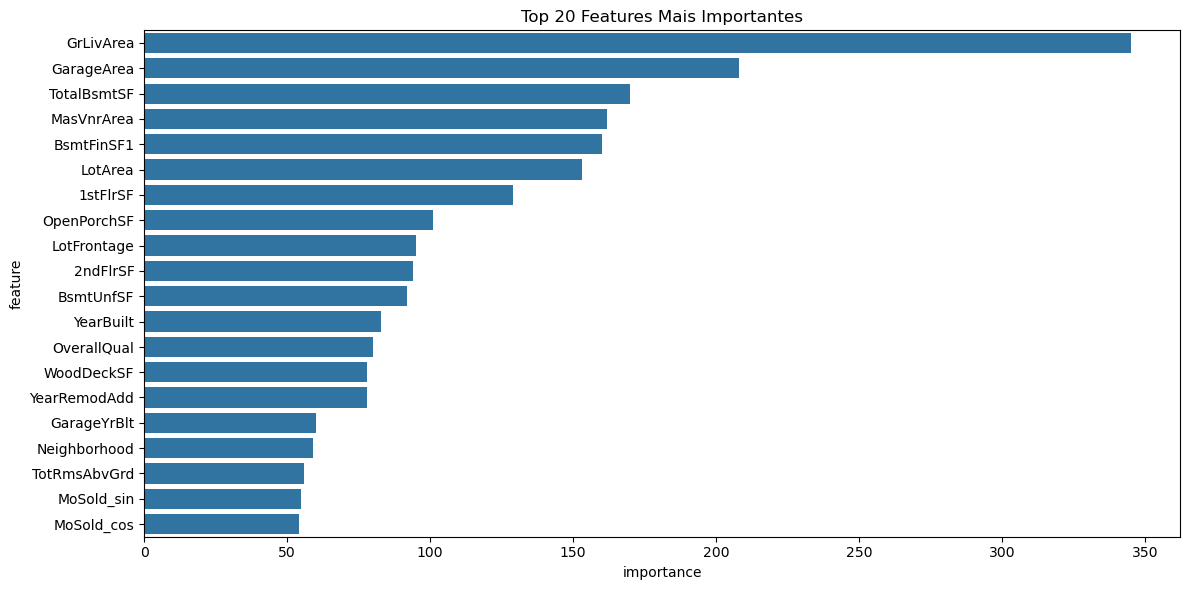

In [ ]:
plot_feature_importance(model, X_train)